<a href="https://colab.research.google.com/github/bacdao/LAML/blob/main/Figure4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**0.0.Install packages**

In [ ]:
install.packages(c("ggrepel", "readxl", "ggpubr", "viridis", "dplyr", "gghalves"))

In [12]:
library(ggplot2)
library(data.table)
library(ggrepel)
library(readxl)
library(ggpubr)
library(viridis)
library(dplyr)
library(gghalves)

#**0.1.Loading data**

####0.1.1.DEGs file from cbioportal

In [13]:
deg <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/deg.tsv", sep = "\t", header = T)
head(deg)

Gene,Cytoband,(A) FLT3 mutation,(B) FLT3 non mutation,(A) FLT3 mutation,(B) FLT3 non mutation,Log Ratio,p-Value,q-Value,Higher expression in
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SDC1,2p24.1,0.59,1.49,0.40,1.05,-0.90,8.72e-14,1.70e-09,(B) FLT3 non mutation
LGALS3BP,17q25,6.21,4.08,1.38,2.07,2.14,1.43e-12,1.39e-08,(A) FLT3 mutation
AMPD1,1p13.2,0.21,0.75,0.26,0.69,-0.54,4.33e-12,2.81e-08,(B) FLT3 non mutation
ADAM6,14q32.33,3.97,5.50,1.09,1.64,-1.53,6.67e-11,2.28e-07,(B) FLT3 non mutation
HID1,17q25.1,0.32,0.81,0.27,0.65,-0.48,7.97e-11,2.28e-07,(B) FLT3 non mutation
SCNN1B,16p12.2-p12.1,0.08,0.28,0.09,0.28,-0.20,8.83e-11,2.28e-07,(B) FLT3 non mutation


In [14]:
deg_filter <- data.frame(deg$Gene,deg$`Log Ratio`,deg$`q-Value`)
colnames(deg_filter) <- c("gene","Log2FC","qvalue")

####0.1.2.DMPs file being obtained from DMP calling

In [15]:
DMP <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/DMP.tsv", header = T)
head(DMP)

logFC,AveExpr,t,P.Value,adj.P.Val,B,C_AVG,T_AVG,deltaBeta,CHR,⋯,feature,cgi,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10,probeID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>
-0.2327954,0.6146601,-8.125071,8.419218e-14,2.017955e-08,20.01816,0.6792507,0.4464554,-0.2327954,6,⋯,5'UTR,opensea,5'UTR-opensea,,NA,TRUE,,rs35278640,,cg12232118
-0.2372033,0.8340115,-8.091791,1.026281e-13,2.017955e-08,19.82215,0.8998251,0.6626218,-0.2372033,19,⋯,Body,island,Body-island,chr19:13135317-13136169,NA,NA,,,,cg26767614
-0.2238275,0.7618051,-7.973394,2.070067e-13,2.713554e-08,19.12774,0.8239075,0.6000800,-0.2238275,X,⋯,Body,shelf,Body-shelf,chrX:152612775-152613464,NA,NA,,,,cg15317375
-0.2351467,0.6787110,-7.882125,3.544572e-13,3.484810e-08,18.59565,0.7439540,0.5088074,-0.2351467,2,⋯,IGR,opensea,IGR-opensea,,TRUE,TRUE,,,,cg04849850
-0.2608458,0.7607761,-7.749485,7.707205e-13,6.061809e-08,17.82753,0.8331494,0.5723037,-0.2608458,3,⋯,5'UTR,opensea,5'UTR-opensea,,NA,NA,,,,cg13458803
-0.1868203,0.8135271,-7.672868,1.203854e-12,7.788728e-08,17.38669,0.8653616,0.6785413,-0.1868203,6,⋯,1stExon,opensea,1stExon-opensea,,NA,TRUE,,rs35278640,,cg27583815


####Merge DMP and DEG with adjusted p_value <0.05 based on gene names

In [16]:
DMP.deg <- merge(DMP,subset(deg_filter, deg_filter$qvalue<0.05), by.x="gene", by.y="gene")
head(DMP.deg)

gene,logFC,AveExpr,t,P.Value,adj.P.Val,B,C_AVG,T_AVG,deltaBeta,⋯,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10,probeID,Log2FC,qvalue
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
ABCA11P,0.18386389,0.1929230,4.590632,8.504808e-06,0.002019666,1.943755,0.1419087,0.3257726,0.18386389,⋯,TSS1500-shore,chr4:467471-467839,NA,NA,,,,cg16937333,-0.55,0.005211
ABCF2,-0.09813842,0.7850417,-3.407057,8.178926e-04,0.040461162,-2.399314,0.8122709,0.7141324,-0.09813842,⋯,3'UTR-shelf,chr7:150901550-150901978,NA,NA,,rs2792441,,cg13080927,0.17,0.045100
ABI3BP,-0.14827558,0.4643640,-3.458780,6.842498e-04,0.035863699,-2.232367,0.5055040,0.3572285,-0.14827558,⋯,5'UTR-opensea,,TRUE,NA,,,,cg15028548,-0.10,0.001733
ABI3BP,-0.15209386,0.4812276,-3.442377,7.242369e-04,0.037258575,-2.285547,0.5234270,0.3713332,-0.15209386,⋯,5'UTR-opensea,,TRUE,NA,,,,cg16163419,-0.10,0.001733
ABI3BP,-0.11851663,0.2280636,-3.350950,9.902709e-04,0.045414576,-2.577924,0.2609468,0.1424302,-0.11851663,⋯,TSS200-opensea,,NA,NA,,,,cg21968765,-0.10,0.001733
ABLIM2,-0.13869887,0.6943165,-3.588829,4.330691e-04,0.026581399,-1.802981,0.7327994,0.5941005,-0.13869887,⋯,Body-opensea,,NA,NA,,,,cg00245896,-0.04,0.044500


####Extract 168 DEGs with |log2FC| >= 0.5, which correspond to the regions of DMPs

In [17]:
DMP.deg.sig <- subset(DMP.deg, abs(DMP.deg$Log2FC) >= 0.5)

####Retain upregulated genes with Log2FC >= 0.5

In [18]:
up.gene <- data.frame(table(subset(DMP.deg.sig, DMP.deg.sig$Log2FC >=0.5)$gene))
up.gene

Var1,Freq
<fct>,<int>
ADAMTS14,2
ADAMTSL4,1
ADPRH,1
ADRB1,5
ADRB2,1
AGXT,4
AIM2,3
ANO7,5
APOL4,1


####0.1.3.Counting RNA-seq file using RPKM

In [19]:
rna <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/rna_rpkm.txt", header=T)
head(rna)

Hybridization REF,TCGA-AB-2803-03A-01T-0734-13,TCGA-AB-2803-03A-01T-0734-13.1,TCGA-AB-2803-03A-01T-0734-13.2,TCGA-AB-2805-03A-01T-0734-13,TCGA-AB-2805-03A-01T-0734-13.1,TCGA-AB-2805-03A-01T-0734-13.2,TCGA-AB-2806-03A-01T-0734-13,TCGA-AB-2806-03A-01T-0734-13.1,TCGA-AB-2806-03A-01T-0734-13.2,⋯,TCGA-AB-3008-03A-01T-0736-13,TCGA-AB-3009-03A-01T-0736-13,TCGA-AB-3009-03A-01T-0736-13.1,TCGA-AB-3009-03A-01T-0736-13.2,TCGA-AB-3011-03A-01T-0736-13,TCGA-AB-3011-03A-01T-0736-13.1,TCGA-AB-3011-03A-01T-0736-13.2,TCGA-AB-3012-03A-01T-0736-13,TCGA-AB-3012-03A-01T-0736-13.1,TCGA-AB-3012-03A-01T-0736-13.2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
gene,raw_counts,median_length_normalized,RPKM,raw_counts,median_length_normalized,RPKM,raw_counts,median_length_normalized,RPKM,⋯,RPKM,raw_counts,median_length_normalized,RPKM,raw_counts,median_length_normalized,RPKM,raw_counts,median_length_normalized,RPKM
?|100134860_calculated,339,25.2169,13.0095,194,14.3952,5.9074,497,36.9257,13.6437,⋯,17.5582,230,17.1040,9.0397,293,21.7429,14.0645,348,25.8796,12.1693
?|127550_calculated,30,1.4702,0.7585,14,0.7067,0.2900,9,0.4399,0.1625,⋯,0.1827,10,0.4809,0.2542,44,2.1496,1.3905,32,1.5679,0.7373
?|339457_calculated,5,0.0980,0.0505,0,0.0000,0.0000,0,0.0000,0.0000,⋯,0.0000,0,0.0000,0.0000,0,0.0000,0.0000,13,0.2409,0.1133
?|441931_calculated,0,0.0000,0.0000,0,0.0000,0.0000,2,0.1276,0.0471,⋯,0.0000,7,0.5582,0.2950,0,0.0000,0.0000,0,0.0000,0.0000
?|64163_calculated,434,13.1215,6.7694,1549,46.7837,19.1987,2155,65.1124,24.0584,⋯,15.4672,1547,46.7432,24.7045,1088,32.8713,21.2629,1355,40.9480,19.2549


In [20]:
colnames(rna) <- gsub("Hybridization REF","geneID",colnames(rna))
colnames(rna) <- substring(names(rna),1,15) #Match the sample ID from RNA-seq to designTSV
rna$geneID <- gsub("[|].*","",rna$geneID)

In [21]:
#Only keep the RPKM
rna <- as.data.frame(rna)
cols <- (rna[1,] %in% "RPKM")
rna1 <- as.data.frame(rna[,cols])
rna1 <- as.data.frame(sapply(rna1[-1,],as.numeric)) #Remove first row with label "RPKM"

In [22]:
rna1$geneID = rna[-1,]$geneID
colnames(rna1) <- substring(colnames(rna1),1,12)

In [23]:
head(rna1)

,TCGA-AB-2803,TCGA-AB-2805,TCGA-AB-2806,TCGA-AB-2807,TCGA-AB-2808,TCGA-AB-2810,TCGA-AB-2811,TCGA-AB-2812,TCGA-AB-2813,TCGA-AB-2814,⋯,TCGA-AB-3001,TCGA-AB-3002,TCGA-AB-3005,TCGA-AB-3006,TCGA-AB-3007,TCGA-AB-3008,TCGA-AB-3009,TCGA-AB-3011,TCGA-AB-3012,geneID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,13.0095,5.9074,13.6437,15.0336,8.4875,12.3562,19.7381,5.2922,6.4513,17.9647,⋯,11.4279,21.6918,9.8702,13.1448,13.0169,17.5582,9.0397,14.0645,12.1693,?
2,0.7585,0.2900,0.1625,0.3045,0.3474,0.8070,0.2382,0.4988,0.5855,0.2175,⋯,0.7050,0.4668,0.0743,0.3311,0.3545,0.1827,0.2542,1.3905,0.7373,?
3,0.0505,0.0000,0.0000,0.0096,0.0000,0.0197,0.0256,0.0475,0.0161,0.0000,⋯,0.2404,0.0213,0.1150,0.2051,0.3157,0.0000,0.0000,0.0000,0.1133,?
4,0.0000,0.0000,0.0471,0.0000,0.0062,0.0000,0.0702,0.0417,0.0000,0.0000,⋯,0.0781,0.0638,0.0000,0.0000,0.0694,0.0000,0.2950,0.0000,0.0000,?
5,6.7694,19.1987,24.0584,26.3761,21.6881,24.3414,18.0437,40.6401,15.3399,21.4808,⋯,17.5488,29.7834,17.0727,21.9033,22.7343,15.4672,24.7045,21.2629,19.2549,?
6,0.8215,0.0436,0.4315,1.2339,0.1060,0.2919,0.8543,0.1111,0.0000,0.6135,⋯,0.1040,0.5646,0.3259,0.3401,0.5083,0.4682,0.2233,0.5466,0.2496,?


####0.1.4.Labeling the 173 samples into 2 group 'FLT3 Mutant' and 'FLT3 wildtype'

In [24]:
designTSV <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/design.tsv", sep="\t", header=T)
designTSV$Title <- substring(designTSV$Title, 1, 12)
head(designTSV)

Title,Group
<chr>,<chr>
TCGA-AB-2803,FLT3 Wild_type
TCGA-AB-2805,FLT3 Wild_type
TCGA-AB-2806,FLT3 Wild_type
TCGA-AB-2807,FLT3 Wild_type
TCGA-AB-2808,FLT3 Wild_type
TCGA-AB-2810,FLT3 Wild_type


####0.1.5.Clinical information obtaining from cBioportal

In [25]:
clinical <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/data_clinical_patient.txt", sep = "\t", header = T)
clinical$`Patient Identifier` <- substring(clinical$`Patient Identifier`, 1, 12)

In [26]:
clinical <- subset(clinical, clinical$`Patient Identifier` %in% designTSV$Title)


####0.1.6. Beta value file of significant DMPs





In [27]:
bVals <- read.table("https://raw.githubusercontent.com/bacdao/LAML/main/data/dmp.bval.tsv", header = T)
head(bVals)

,TCGA.AB.2802.03A.01D.0741.05,TCGA.AB.2803.03A.01D.0741.05,TCGA.AB.2804.03A.01D.0741.05,TCGA.AB.2805.03A.01D.0741.05,TCGA.AB.2806.03A.01D.0741.05,TCGA.AB.2807.03A.01D.0741.05,TCGA.AB.2808.03A.01D.0741.05,TCGA.AB.2809.03A.01D.0741.05,TCGA.AB.2810.03A.01D.0741.05,TCGA.AB.2811.03A.01D.0741.05,⋯,TCGA.AB.3001.03A.01D.0741.05,TCGA.AB.3002.03A.01D.0742.05,TCGA.AB.3005.03A.01D.0741.05,TCGA.AB.3006.03A.01D.0741.05,TCGA.AB.3007.03A.01D.0741.05,TCGA.AB.3008.03A.01D.0741.05,TCGA.AB.3009.03A.01D.0741.05,TCGA.AB.3011.03A.01D.0742.05,TCGA.AB.3012.03A.01D.0741.05,probeID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0.20258542,0.1881645,0.30188600,0.54520438,0.2771443,0.3126295,0.5251780,0.14867041,0.47703425,0.12465634,⋯,0.2582559,0.4162556,0.17595294,0.3374858,0.28956108,0.5168190,0.5666842,0.30894333,0.27418530,cg00004105
2,0.87128654,0.8797054,0.65391950,0.91022701,0.8848335,0.9084627,0.8345292,0.78559315,0.91723788,0.73987453,⋯,0.8124005,0.8812568,0.86616988,0.8335706,0.86051258,0.8772689,0.9290041,0.80065140,0.84424910,cg00005112
3,0.06995167,0.3586375,0.09896956,0.07958365,0.1960452,0.3516967,0.3602499,0.06636237,0.09627036,0.16211432,⋯,0.3065395,0.1168500,0.07486682,0.3606512,0.05118334,0.4326400,0.8477550,0.14423513,0.08601827,cg00008488
4,0.63022637,0.8290350,0.80836976,0.58272420,0.2261923,0.4546039,0.3240115,0.19800331,0.96747660,0.10409372,⋯,0.6727035,0.8979698,0.53250173,0.3744537,0.81733655,0.5079594,0.5261353,0.33187905,0.79642962,cg00010078
5,0.43592016,0.5122458,0.23885733,0.46245068,0.2610428,0.7620144,0.2450230,0.30369975,0.94468122,0.03683036,⋯,0.6218875,0.9623299,0.15892877,0.2839188,0.82158893,0.5322712,0.7604562,0.09565031,0.62832639,cg00011924
6,0.75246284,0.8869317,0.86394402,0.88556404,0.9008800,0.9117954,0.7018995,0.90816260,0.93059793,0.65852654,⋯,0.8791707,0.8870081,0.62982586,0.9119414,0.77372892,0.8966908,0.9089616,0.90901246,0.91128007,cg00019997


In [29]:
colnames(bVals) <- substring(colnames(bVals),1,12)
#Keep samples with ID matching with designTSV file above
colnames(bVals) <- gsub("[.]","-",colnames(bVals))
bVals1 <- subset(bVals, select=c("probeID",designTSV$Title))

#**1.FIGURE_4**

##**1.1.Figure_4.A**

####Functional enrichment analysis with g:profiler

In [ ]:
install.packages("gprofiler2")
library(gprofiler2)

In [31]:
gostres <- gost(query = up.gene$Var1,organism = "hsapiens")

In [32]:
gostres$result

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
query_1,TRUE,2.967463e-06,225,65,10,0.15384615,0.044444444,GO:0009952,GO:BP,anterior/posterior pattern specification,21110,3868,GO:0003002
query_1,TRUE,4.110672e-05,481,65,12,0.18461538,0.024948025,GO:0007389,GO:BP,pattern specification process,21110,2960,"GO:0007275, GO:0032501"
query_1,TRUE,9.659881e-05,3848,65,31,0.47692308,0.008056133,GO:0009893,GO:BP,positive regulation of metabolic process,21110,3831,"GO:0008152, GO:0019222, GO:0048518"
query_1,TRUE,1.508606e-04,436,65,11,0.16923077,0.025229358,GO:0003002,GO:BP,regionalization,21110,1472,GO:0007389
query_1,TRUE,2.147304e-04,2081,65,22,0.33846154,0.010571840,GO:0009891,GO:BP,positive regulation of biosynthetic process,21110,3829,"GO:0009058, GO:0009889, GO:0009893"
query_1,TRUE,2.359395e-04,3535,65,29,0.44615385,0.008203678,GO:0010604,GO:BP,positive regulation of macromolecule metabolic process,21110,4347,"GO:0009893, GO:0043170, GO:0060255"
query_1,TRUE,2.916406e-04,1257,65,17,0.26153846,0.013524264,GO:0045944,GO:BP,positive regulation of transcription by RNA polymerase II,21110,12439,"GO:0006357, GO:0006366, GO:0045893"
query_1,TRUE,3.162452e-04,1942,65,21,0.32307692,0.010813594,GO:0010557,GO:BP,positive regulation of macromolecule biosynthetic process,21110,4305,"GO:0009059, GO:0009891, GO:0010556, GO:0010604"
query_1,TRUE,5.863467e-04,7716,65,44,0.67692308,0.005702436,GO:0032501,GO:BP,multicellular organismal process,21110,8031,GO:0008150


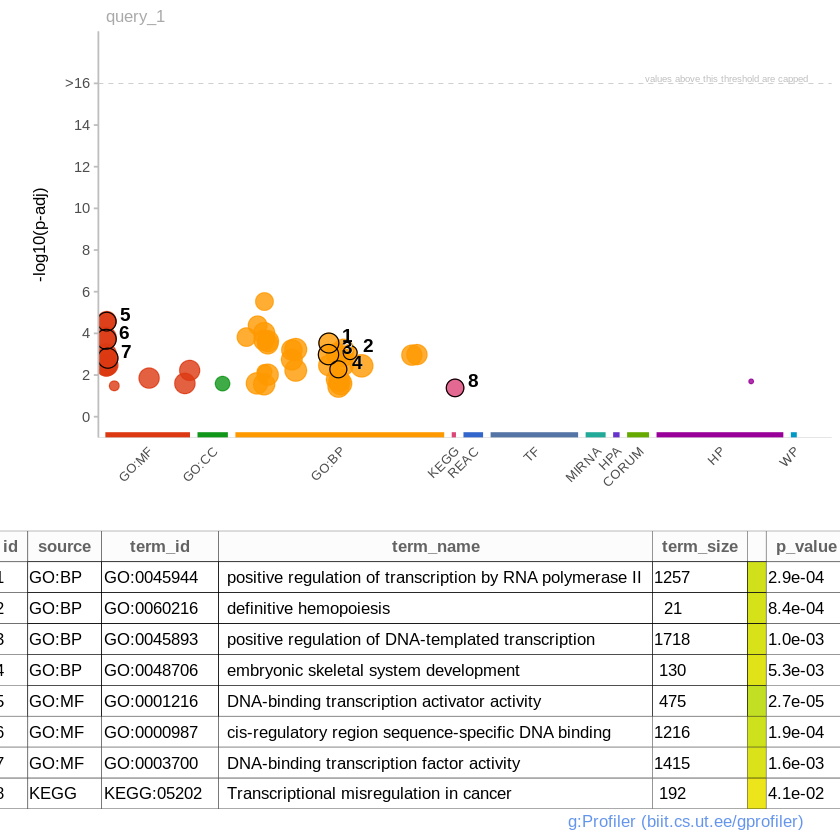

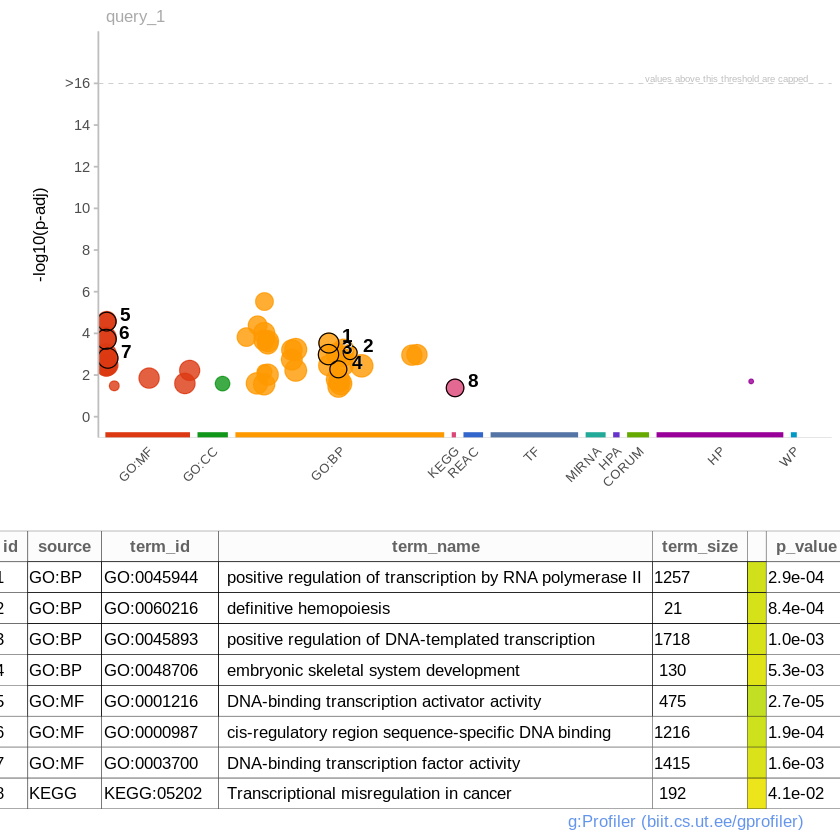

In [33]:
p1 = gostplot(gostres, interactive = FALSE)
publish_gostplot(p1, highlight_terms = c("GO:0045944", "GO:0060216","GO:0045893", "GO:0048706", "GO:0001216","GO:0000987","GO:0003700", "KEGG:05202"))

##**1.2.Figure_4.B**

####Finding potential transcription factor with ShinyGO

####Acess to http://bioinformatics.sdstate.edu/go74/ (ShinyGO) to find potential transcription factor. The following data table is the result from TRANSFAC and JASPAR database

In [34]:
tf <- read.csv("https://raw.githubusercontent.com/bacdao/LAML/main/data/TF.csv", header=T, sep=",")
tf$rlogfdr <- -log10(tf$Enrichment.FDR)
tf

Enrichment.FDR,nGenes,Pathway.Genes,Fold.Enrichment,Pathway,URL,Genes,rlogfdr
<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>
0.01102212,19,2425,2.480664,WT1 (human),https://amp.pharm.mssm.edu/Enrichr,NFIX ADRB1 TBXAS1 IGF2BP2 HOXA9 APOL4 GRB10 CCL1 TREML2 NKX2-3 CLU HOXA7 CCDC136 ARHGAP22 PRDM16 ADAMTSL4 PBX3 IRX3 CDC42BPB,1.957735
0.01102212,24,3437,2.210843,NR5A2 (human),https://amp.pharm.mssm.edu/Enrichr,NFIX ITGAE APOL4 ATP8B4 GRB10 LGALS3BP CCL1 ST3GAL4 TREML2 SMC4 CLU HOXA7 MMP19 KRT17 ARHGAP22 ANO7 ZNF185 TRIM46 GTSF1 AGXT WT1 LDLRAD2 IL1RAP CRIP1,1.957735
0.02113735,21,3162,2.102730,TFAP2A (human),https://amp.pharm.mssm.edu/Enrichr,ADRB1 TBXAS1 IGF2BP2 BIK CLIP2 ST3GAL4 CLU HOXA7 HIP1 KRT17 MEIS1 NR1I2 ZNF185 GFI1 AIM2 KCNK5 PBX3 IRX3 WT1 CRIP1 HOXA10,1.674949
0.02113735,10,897,3.529667,ZNF281 (human),https://amp.pharm.mssm.edu/Enrichr,BIK ST3GAL4 HOXA7 ARHGAP22 TSPAN2 PRDM16 KCNK5 PBX3 HOXB4 CDC42BPB,1.674949
0.02113735,18,2517,2.264203,RELA (human),https://amp.pharm.mssm.edu/Enrichr,HOXA9 ITGAE LYRM1 ATP8B4 DMXL2 GRB10 CLU HIP1 ARHGAP22 NR1I2 ZNF185 CD96 TNFSF13 AIM2 GTSF1 HOXB2 IRX3 CRIP1,1.674949
0.02313281,23,3796,1.918350,E2F1 (human),https://amp.pharm.mssm.edu/Enrichr,ADRB1 TBXAS1 IGF2BP2 DMXL2 CLIP2 ST3GAL4 SMC4 CISH NKX2-3 CLU HOXA7 KRT17 CCDC136 PRDM16 ZNF185 GFI1 PBX3 AGXT IRX3 HOXB4 WT1 CARD9 CDC42BPB,1.635772
0.02313281,23,3825,1.903805,TCF4 (human),https://amp.pharm.mssm.edu/Enrichr,TBXAS1 HOXA9 APOL4 LYRM1 ATP8B4 GRB10 HOXB3 HOXA7 MMP19 TREM1 HIP1 ARHGAP22 TSPAN2 ENPP2 NR1I2 ZNF185 CD96 TNFSF13 GFI1 ADRB2 HOXB2 IRX3 LDLRAD2,1.635772
0.02313281,12,1330,2.856642,REPIN1 (human),https://amp.pharm.mssm.edu/Enrichr,ADRB1 TBXAS1 ITGAE GRB10 ST3GAL4 CCDC136 ARHGAP22 PRDM16 MEIS1 ADPRH ZNF185 GFI1,1.635772
0.02950557,11,1238,2.813184,PCBP1 (human),https://amp.pharm.mssm.edu/Enrichr,TBXAS1 IGF2BP2 PDLIM1 ST3GAL4 NT5DC3 HIP1 CCDC136 PRDM16 PBX3 IRX3 CDC42BPB,1.530096


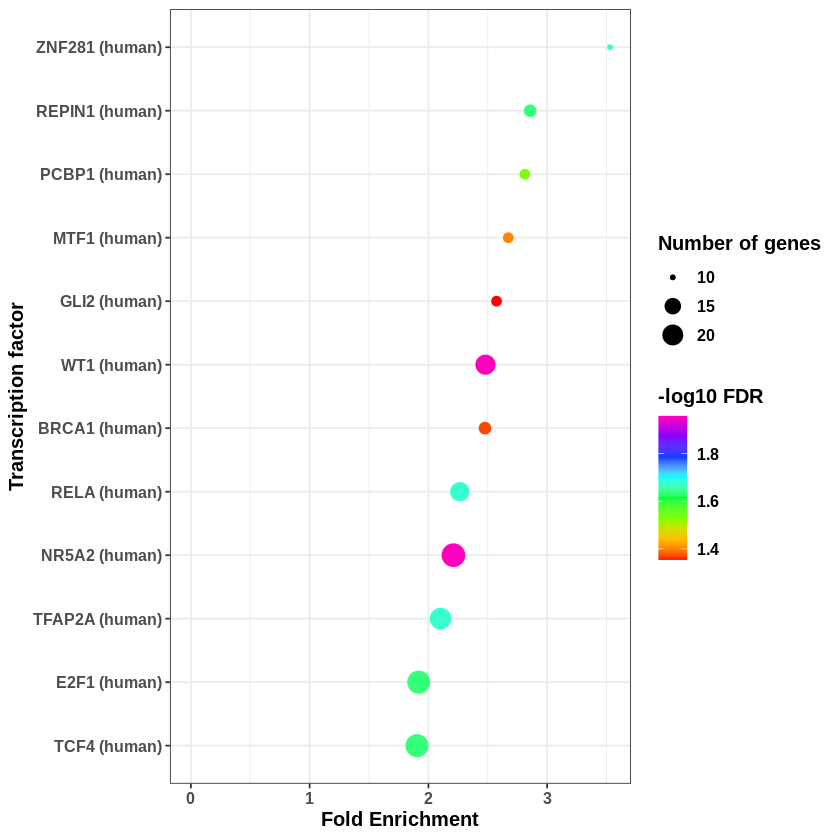

In [38]:
ggplot(tf, aes(x=Fold.Enrichment, xend=0, y=reorder(Pathway, Fold.Enrichment), yend=Pathway, colour=rlogfdr)) + scale_color_gradientn(colours = rainbow(8)) + theme_bw()+ geom_point(aes(size=nGenes)) + theme(text = element_text(size = 12, face="bold")) + labs(x="Fold Enrichment", y="Transcription factor", colour="-log10 FDR",size="Number of genes")


##**1.3.Figure_4.C**

####Box plots for comparison of 3 genes (IDH1, IDH2, TET2) between FLT3 mutant and FLT3 wildtype groups

In [ ]:
install.packages("reshape2")
library(reshape2)

In [ ]:
rna2 <- subset(rna1, select=c("geneID",designTSV$Title))
rna3 <- melt(rna2, id.vars="geneID")
rna3 <- merge(rna3, designTSV, by.x="variable", by.y="Title")


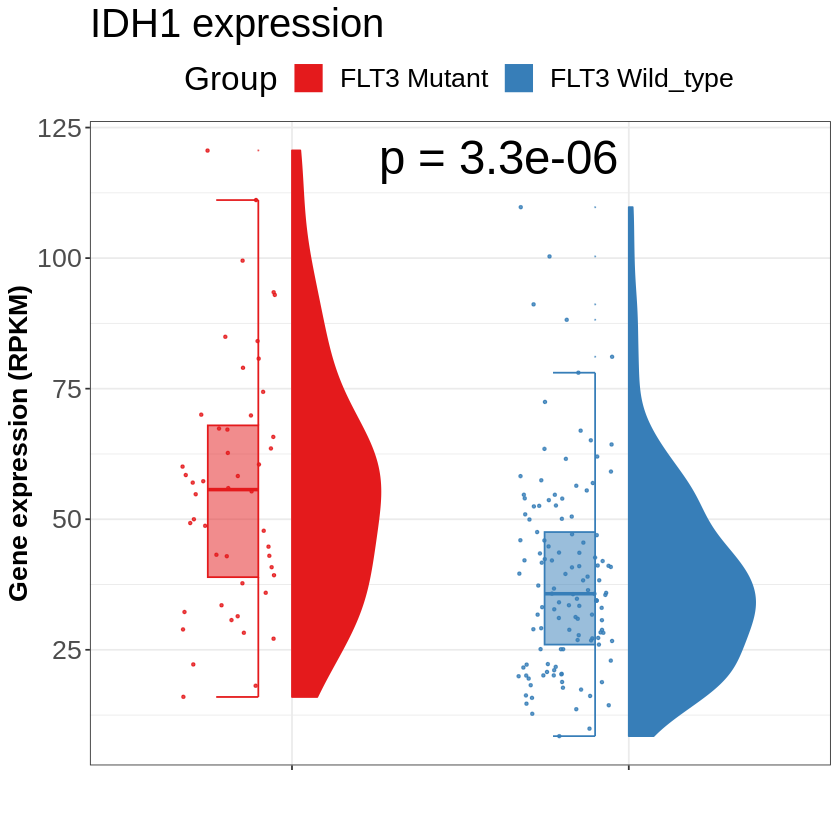

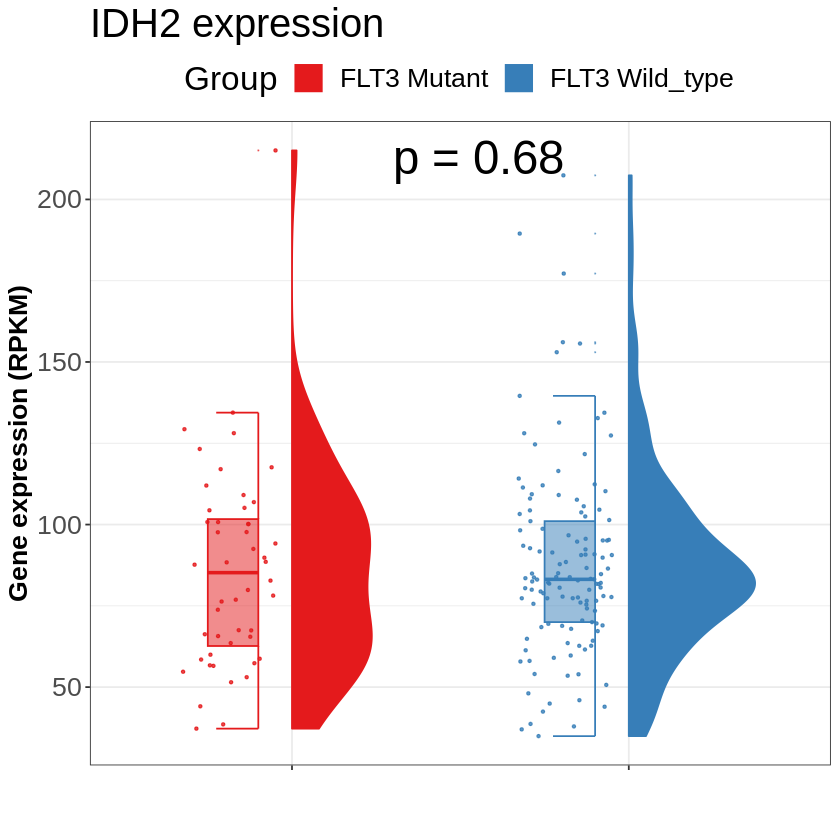

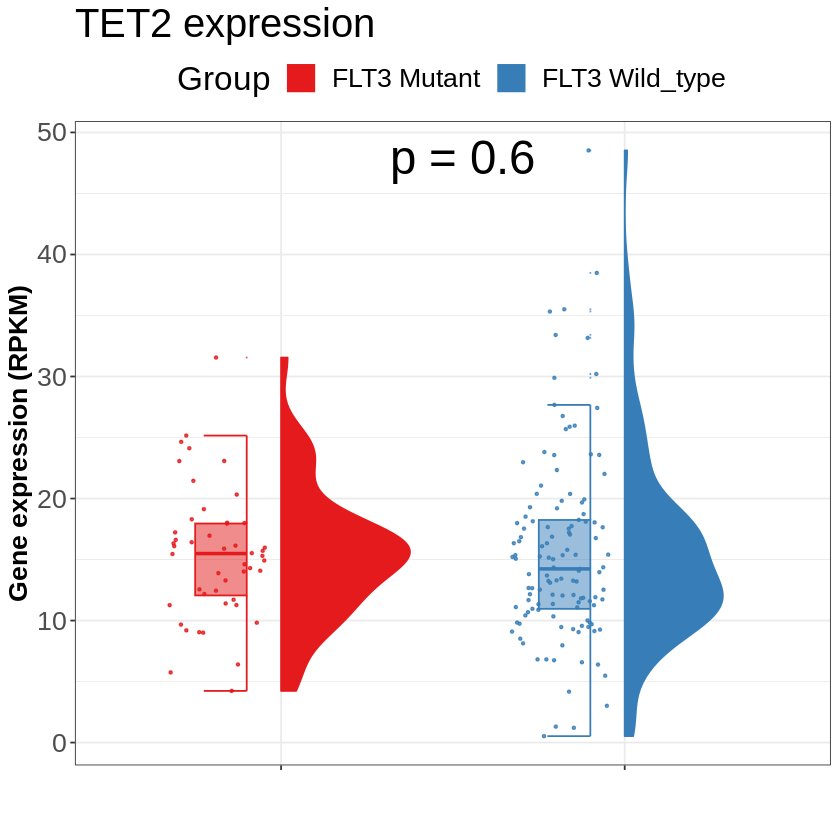

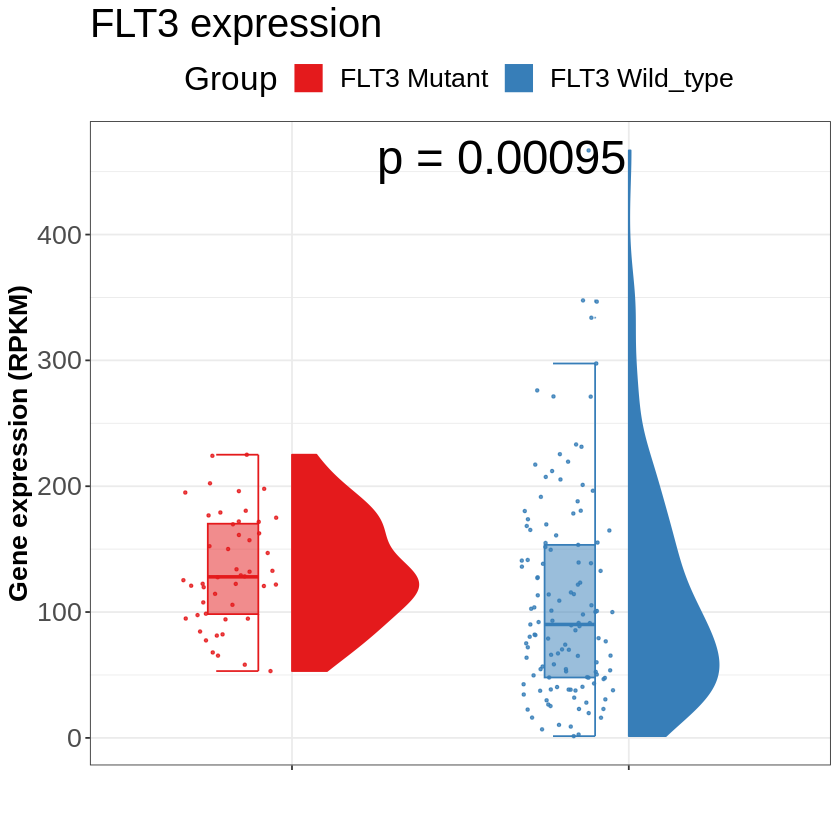

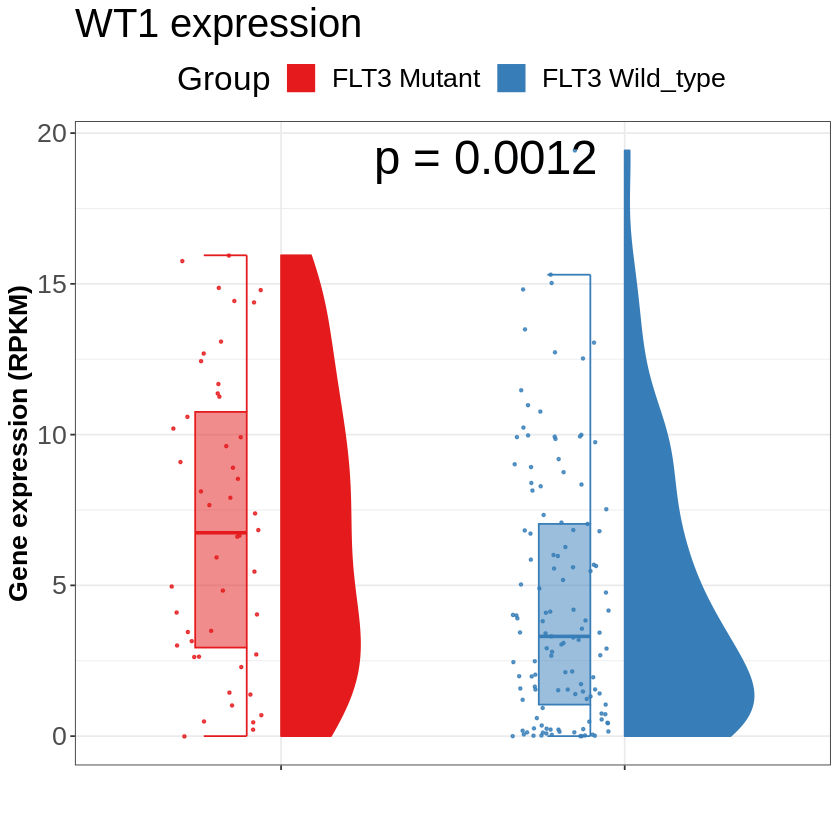

In [ ]:
genes <- c("IDH1", "IDH2", "TET2", "FLT3", "WT1")

for (gene in genes) {
  comp_exp <- subset(rna3, geneID %in% gene)

  p <- ggplot(comp_exp, aes(x = Group, y = value)) +
    theme_bw() +
    geom_half_point(aes(y = value, fill = Group, color = Group), side = "l", size = 0.6, alpha = 0.8) +
    geom_half_boxplot(aes(y = value, color = Group, fill = Group), side = "l", width = 0.5, alpha = 0.5, nudge = 0.1, outlier.size = 0) +
    geom_half_violin(aes(y = value, fill = Group, color = Group), side = "r") +
    stat_compare_means(label = "p.format", label.x = 1.4, size = 10, vjust = 0.7) +
    theme(text = element_text(size = 20), axis.title.y = element_text(size = 16, face = "bold"), legend.position = "top") +
    scale_x_discrete(labels = c("", "")) +
    xlab("") +
    ylab("Gene expression (RPKM)") +
    ggtitle(paste0(gene, " expression")) +
    scale_fill_brewer(palette = "Set1") +
    scale_color_brewer(palette = "Set1")

  # Print the plot for the current gene
  print(p)
}

##**1.4.Figure_4.D**

In [ ]:
install.packages(c("survival","survminer","lubridate"))
library(survival)
library(survminer)
library(lubridate)

In [ ]:
clinical$STATUS <- ifelse(grepl('0:LIVING',clinical$`Overall Survival Status`),0,1)
clinical$OS <- as.numeric(clinical$`Overall Survival (Months)`)

In [ ]:
#Subset a dataframe which only contains 168 significant genes from DMP.deg.sig gene list above
rna2 <- subset(rna2, rna2$geneID %in% DMP.deg.sig$gene)
dim(rna2)

[1] 168 174

In [ ]:
rna2 <- melt(rna2, id.vars="geneID")

####Survival analysis by gene expression, using median RPKM as cut off to classify into "High" or "Low" expression

In [ ]:
# Merge clinical and gene expression data
surv_rna <- merge(clinical, rna2, by.x = "Patient Identifier", by.y = "variable")

# Initialize lists to store results
sigpval_gene <- list()

# Iterate over unique gene IDs
unique_genes <- unique(surv_rna$geneID)
for (gene in unique_genes) {
  surv <- filter(surv_rna, geneID == gene)
  surv$exp <- ifelse(surv$value > median(surv$value), "High expression", "Low expression")
  fit <- survfit(Surv(OS, STATUS) ~ exp, data = surv)
  p_val <- surv_pvalue(fit)$pval

  # Store significant gene names and p-values
  if (p_val < 0.05) {
    sigpval_gene[[gene]] <- p_val
  }
}

# Convert results to a data frame
sigpval_gene_df <- data.frame(geneID = names(sigpval_gene), pval = unlist(sigpval_gene))

# Print the significant gene names and p-values
sorted_sigpval_gene_df <- sigpval_gene_df %>% arrange(pval)

print(sorted_sigpval_gene_df)

           geneID         pval
PDE3B       PDE3B 2.116328e-05
TREML2     TREML2 1.402848e-04
CFD           CFD 1.589276e-03
DLK1         DLK1 1.638657e-03
ISG20       ISG20 2.152570e-03
MAP4K4     MAP4K4 2.164050e-03
CRIP1       CRIP1 3.907866e-03
HOXA9       HOXA9 4.447996e-03
MCF2L       MCF2L 4.951125e-03
MEIS1       MEIS1 6.307896e-03
PRDM16     PRDM16 1.146723e-02
SLCO5A1   SLCO5A1 1.786063e-02
NKX2-3     NKX2-3 2.013504e-02
AZU1         AZU1 2.375418e-02
ARHGAP22 ARHGAP22 2.693764e-02
RPS6KA2   RPS6KA2 2.705982e-02
ZNF721     ZNF721 3.146311e-02
HOXA10     HOXA10 3.374437e-02
CRIM1       CRIM1 3.442267e-02
ADAMTS3   ADAMTS3 3.833572e-02
EPB42       EPB42 3.875825e-02
FNBP1L     FNBP1L 4.145573e-02
PBX3         PBX3 4.178254e-02
EPAS1       EPAS1 4.206987e-02
HOXA6       HOXA6 4.254105e-02
TNFSF13   TNFSF13 4.330045e-02
TRPS1       TRPS1 4.478016e-02
SDC1         SDC1 4.523201e-02
IL1RAP     IL1RAP 4.618427e-02
IGFBP4     IGFBP4 4.676460e-02
SLC4A1     SLC4A1 4.702769e-02
RAB3IL1 

####Survival analysis by DNA methylation, using mean Beta value as cut off to classify into "Hyper" or "Hypo" methylation

In [ ]:
bVals2 <- subset(bVals1, bVals1$probeID %in% DMP.deg.sig$probeID)
dim(bVals2)


[1] 550 174

In [ ]:
bVals2 <- melt(bVals2, id.vars="probeID")

In [ ]:
# Merge clinical and methylation data
surv_meth <- merge(clinical, bVals2, by.x = "Patient Identifier", by.y = "variable")

# Initialize lists to store results
sigpval_meth <- list()

# Iterate over unique probe IDs
unique_probes <- unique(surv_meth$probeID)
for (probe in unique_probes) {
  surv <- filter(surv_meth, probeID == probe)
  surv$meth <- ifelse(surv$value > median(surv$value), "High methylation", "Low methylation")
  fit <- survfit(Surv(OS, STATUS) ~ meth, data = surv)
  p_val <- surv_pvalue(fit)$pval

  # Store significant probe IDs and p-values
  if (p_val < 0.05) {
    sigpval_meth[[probe]] <- p_val
  }
}

# Convert results to a data frame
sigpval_meth_df <- data.frame(probeID = names(sigpval_meth), pval = unlist(sigpval_meth))

# Sort the data frame by pval in ascending order
sorted_sigpval_meth_df <- sigpval_meth_df %>% arrange(pval)

# Print the sorted data frame
print(sorted_sigpval_meth_df)

              probeID         pval
cg01525376 cg01525376 0.0001333559
cg04239247 cg04239247 0.0001919935
cg19816811 cg19816811 0.0006629744
cg13783238 cg13783238 0.0008263650
cg17001566 cg17001566 0.0012215717
cg01891966 cg01891966 0.0023108373
cg09100593 cg09100593 0.0028280903
cg09411999 cg09411999 0.0030074147
cg06348826 cg06348826 0.0044641176
cg09545579 cg09545579 0.0045364883
cg21375204 cg21375204 0.0047767949
cg16327477 cg16327477 0.0048691853
cg15592062 cg15592062 0.0050101506
cg23014425 cg23014425 0.0053862634
cg03711485 cg03711485 0.0053951683
cg24105081 cg24105081 0.0054679736
cg14914532 cg14914532 0.0056933528
cg19589358 cg19589358 0.0057753956
cg25308086 cg25308086 0.0058035000
cg15975980 cg15975980 0.0058100283
cg24389054 cg24389054 0.0061323089
cg22122862 cg22122862 0.0061369956
cg01809214 cg01809214 0.0069483091
cg21164005 cg21164005 0.0078424527
cg13164814 cg13164814 0.0081523696
cg10181414 cg10181414 0.0089898596
cg22506548 cg22506548 0.0091076674
cg13985118 cg1398511

####Overlap genes and probes

In [ ]:
ovl_gp <- subset(DMP.deg.sig, DMP.deg.sig$probeID %in% sorted_sigpval_meth_df$probeID & DMP.deg.sig$gene %in% sorted_sigpval_gene_df$geneID)


In [ ]:
unique(ovl_gp$gene)

[1] "ARHGAP22" "CRIM1"    "DLK1"     "FNBP1L"   "HOXA10"   "HOXA6"   
 [7] "HOXA9"    "MCF2L"    "NKX2-3"   "PDE3B"    "PRDM16"   "RPS6KA2" 
[13] "SLC4A1"

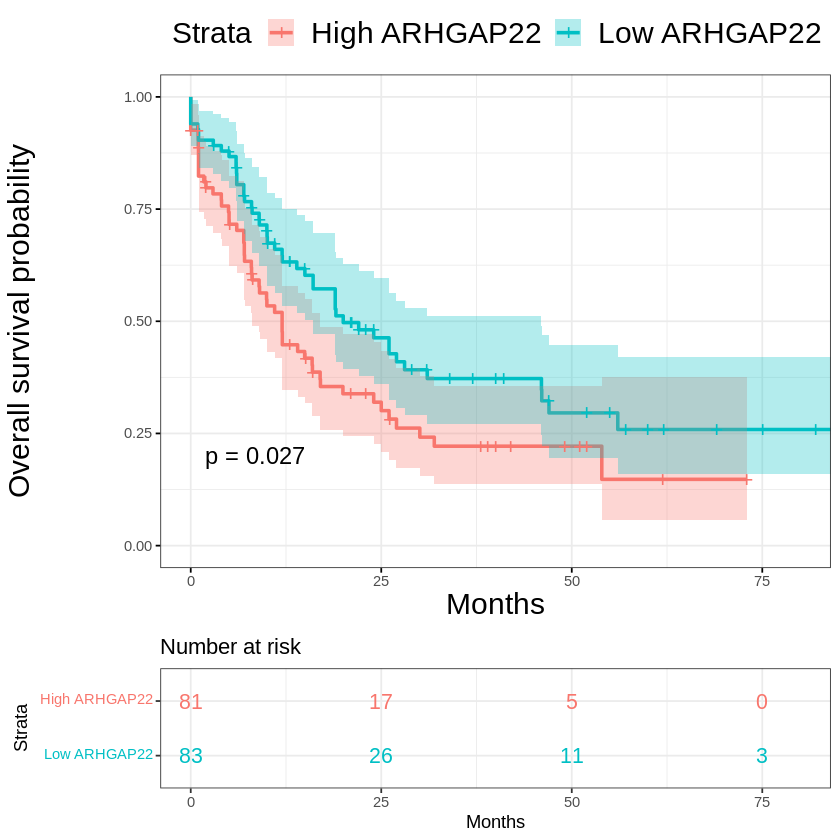

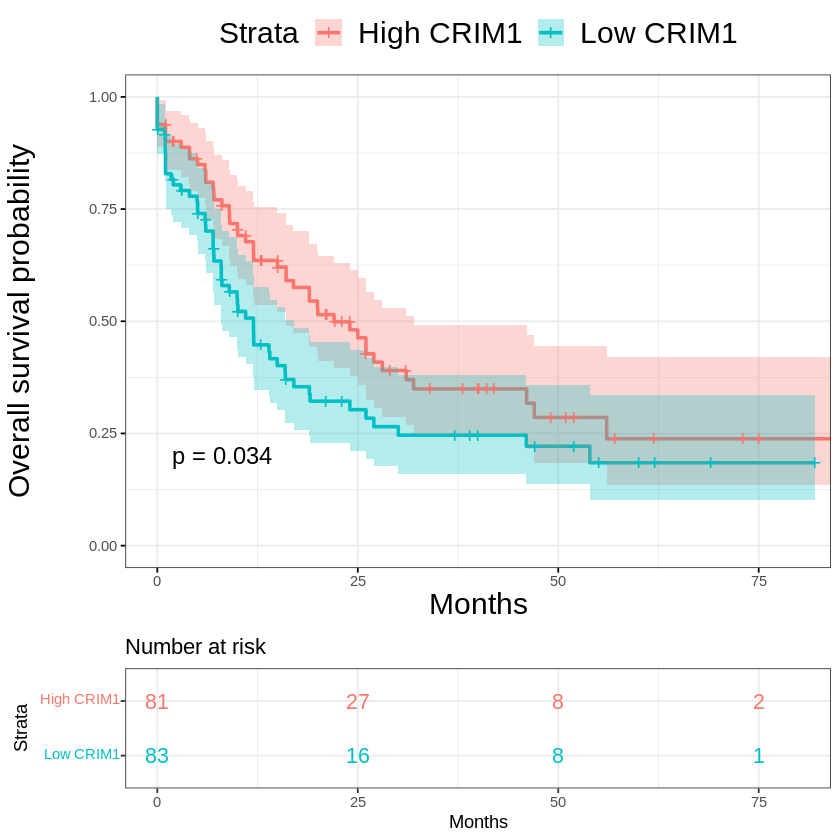

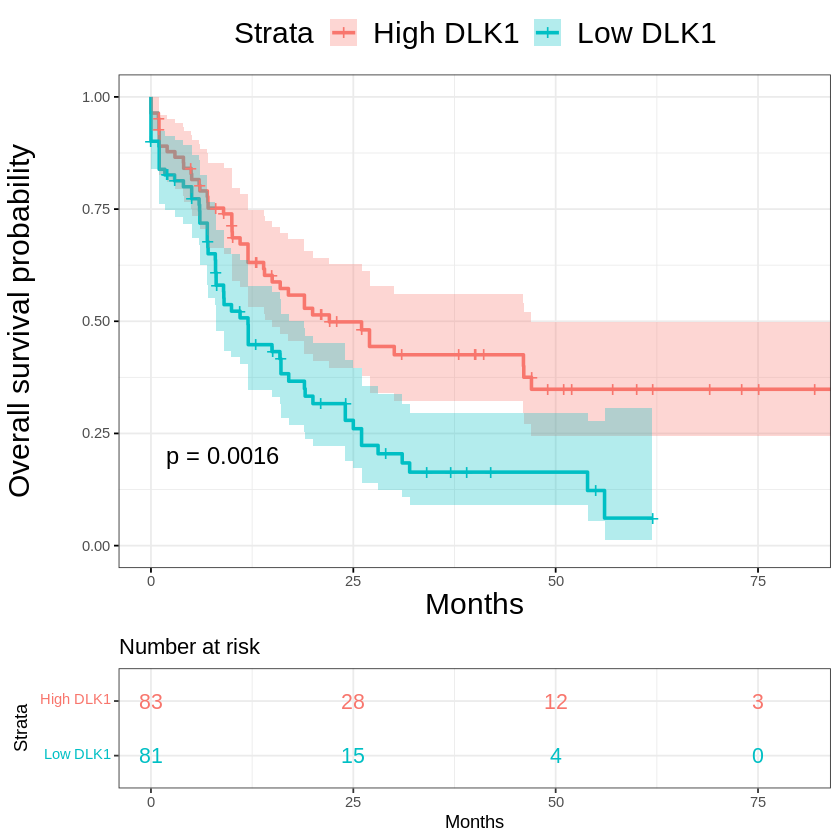

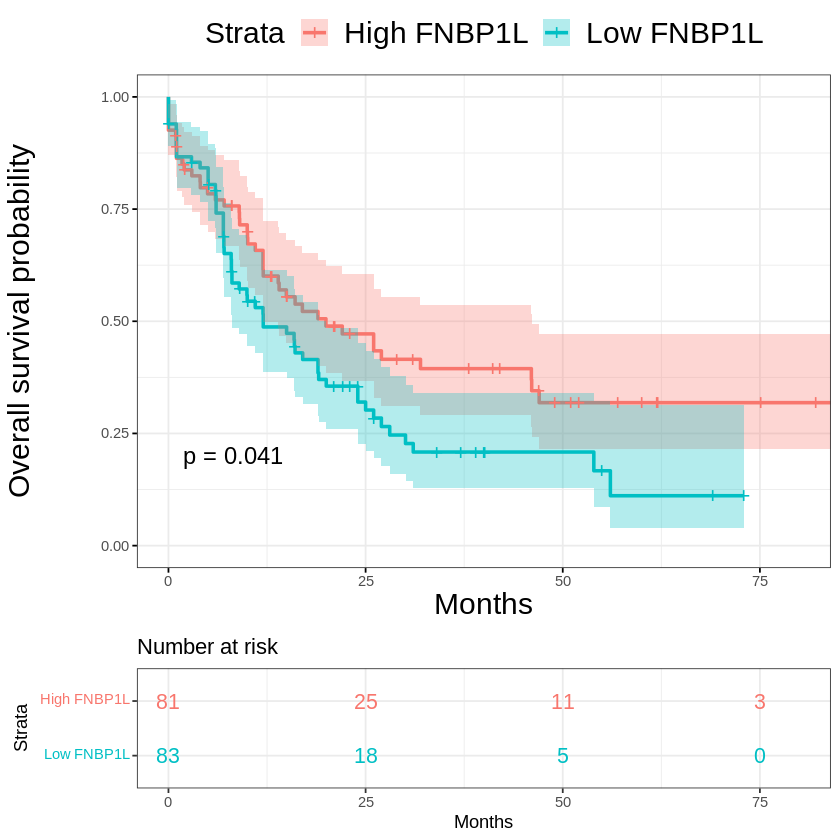

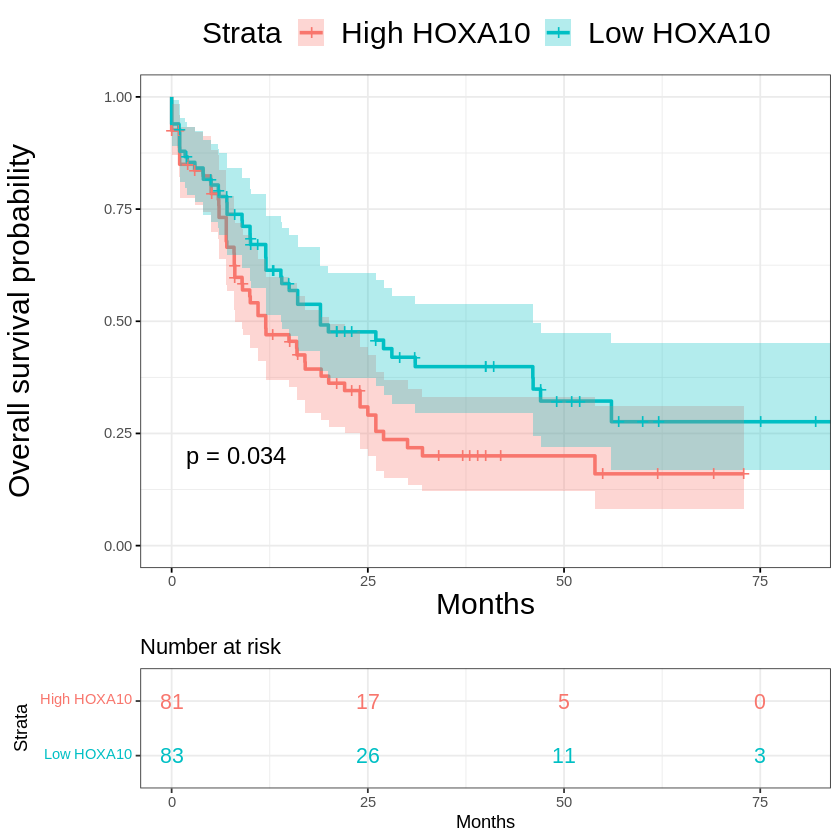

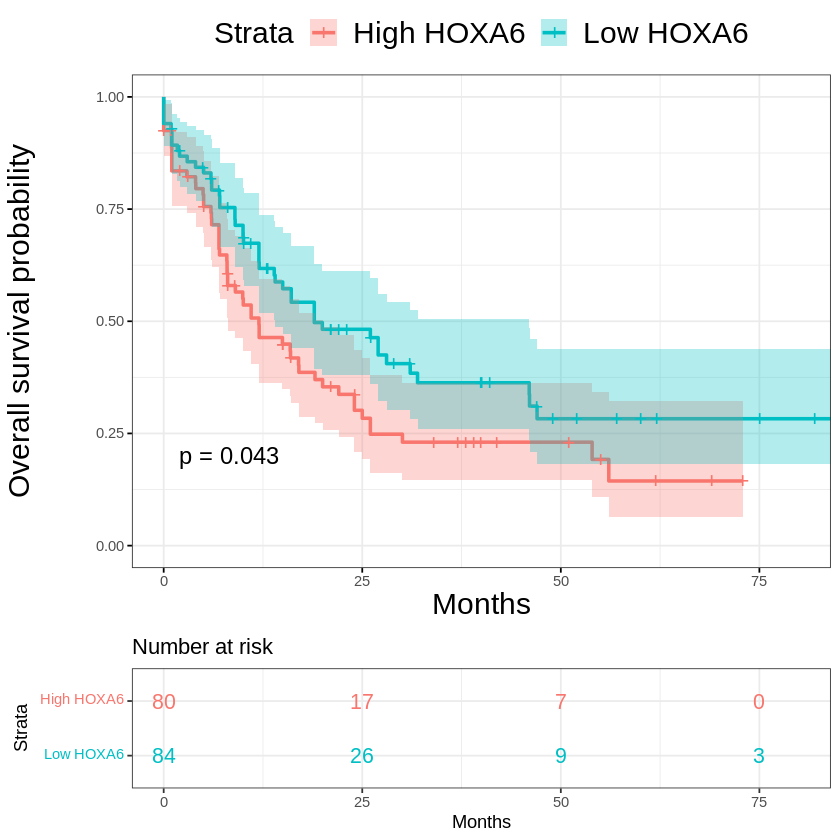

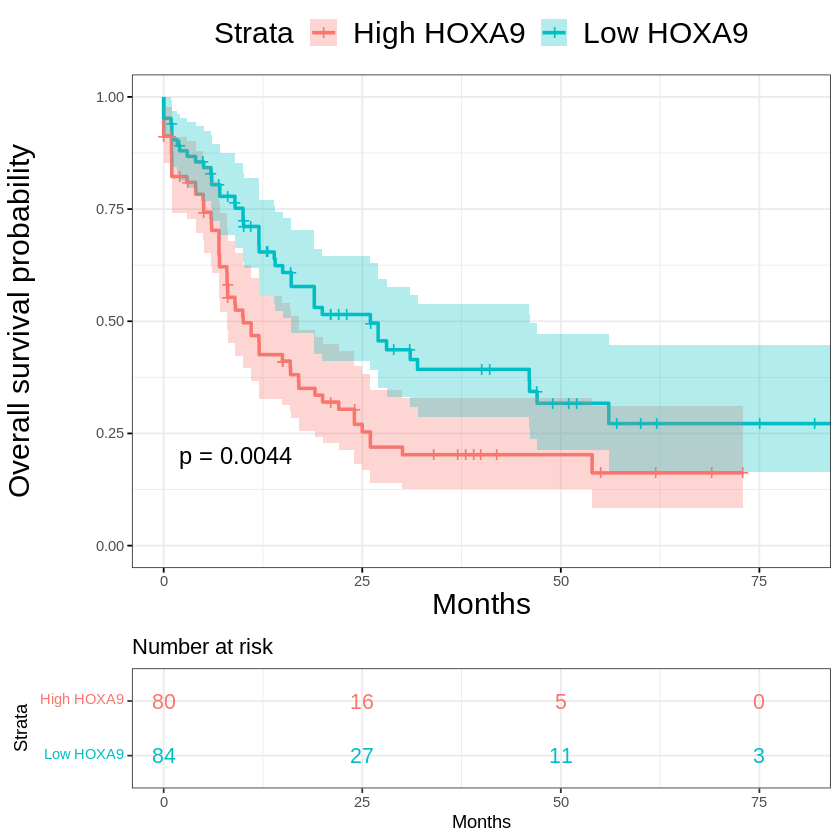

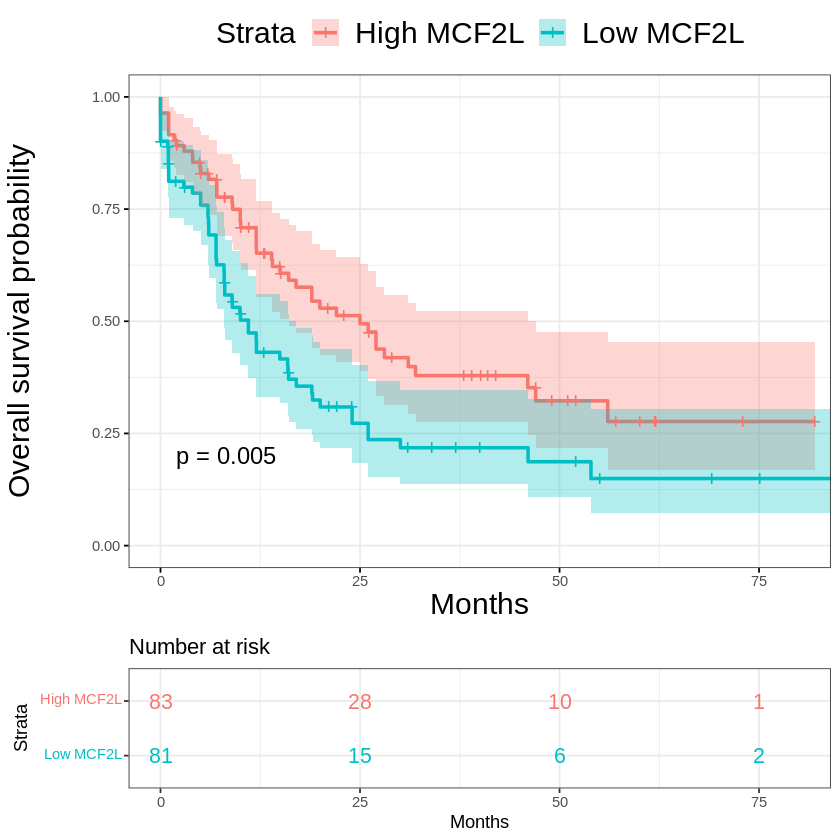

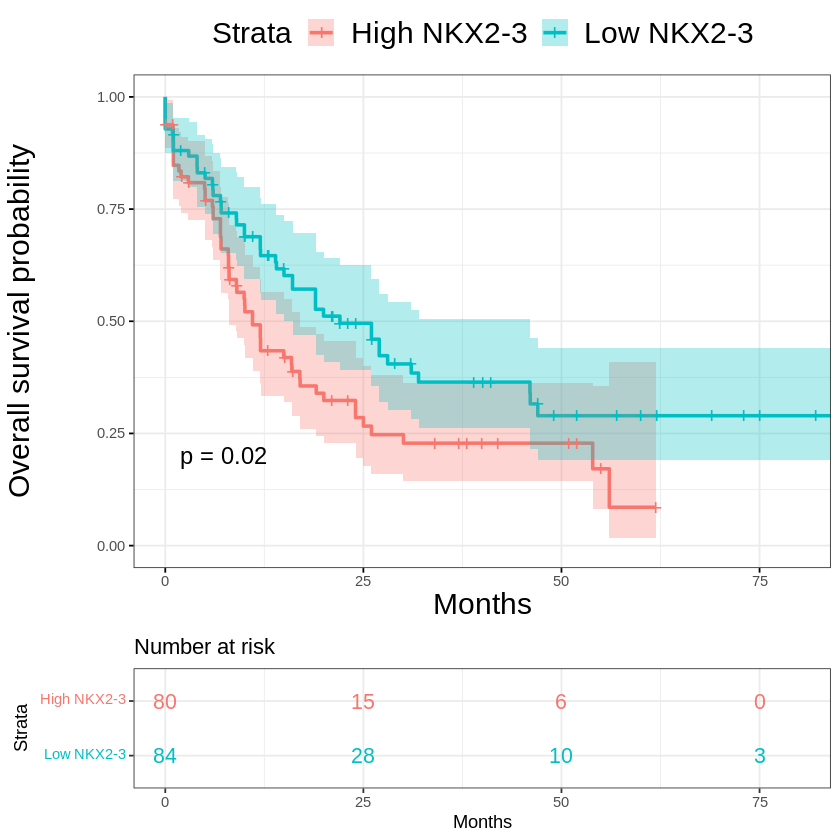

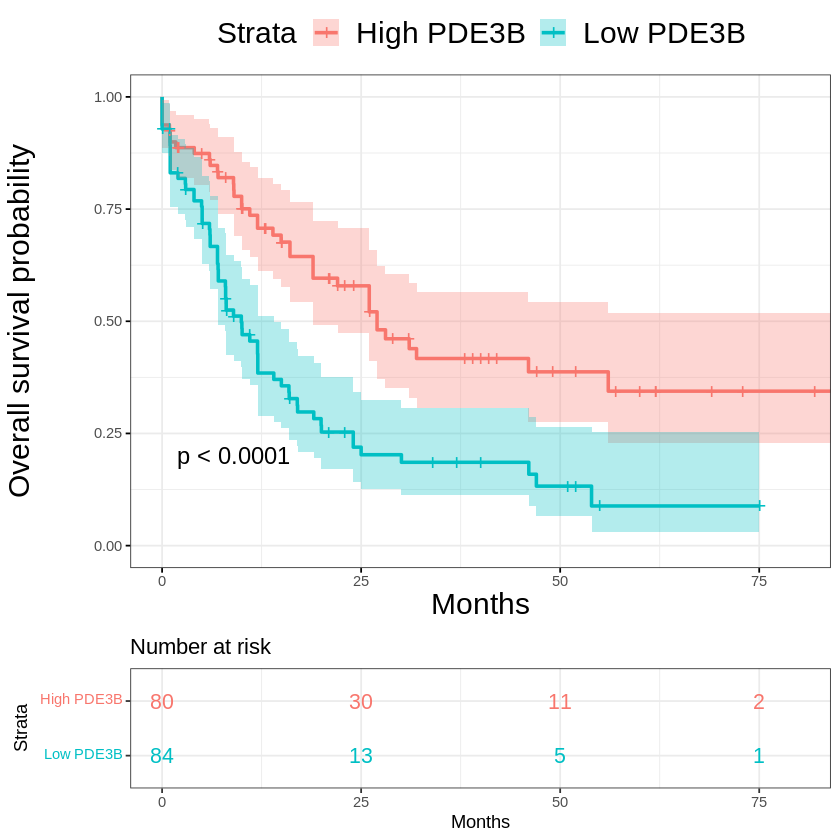

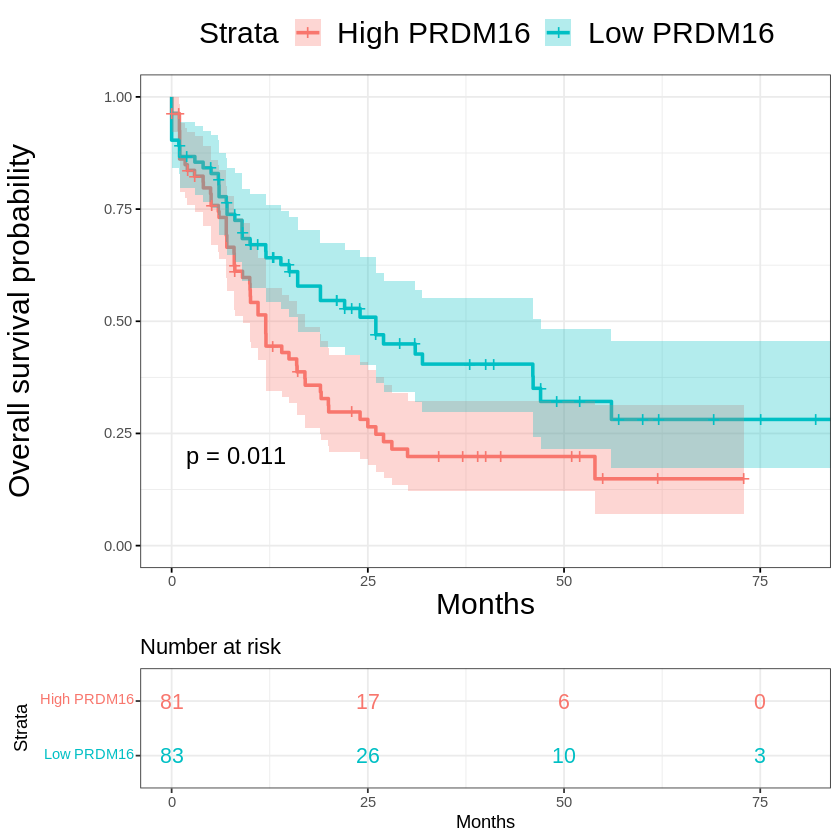

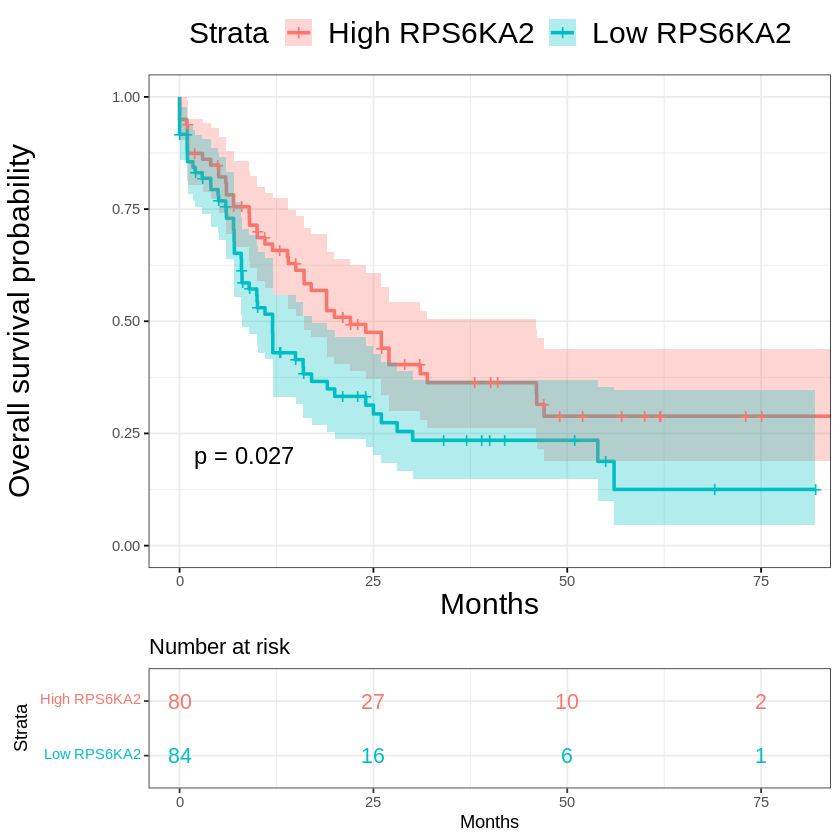

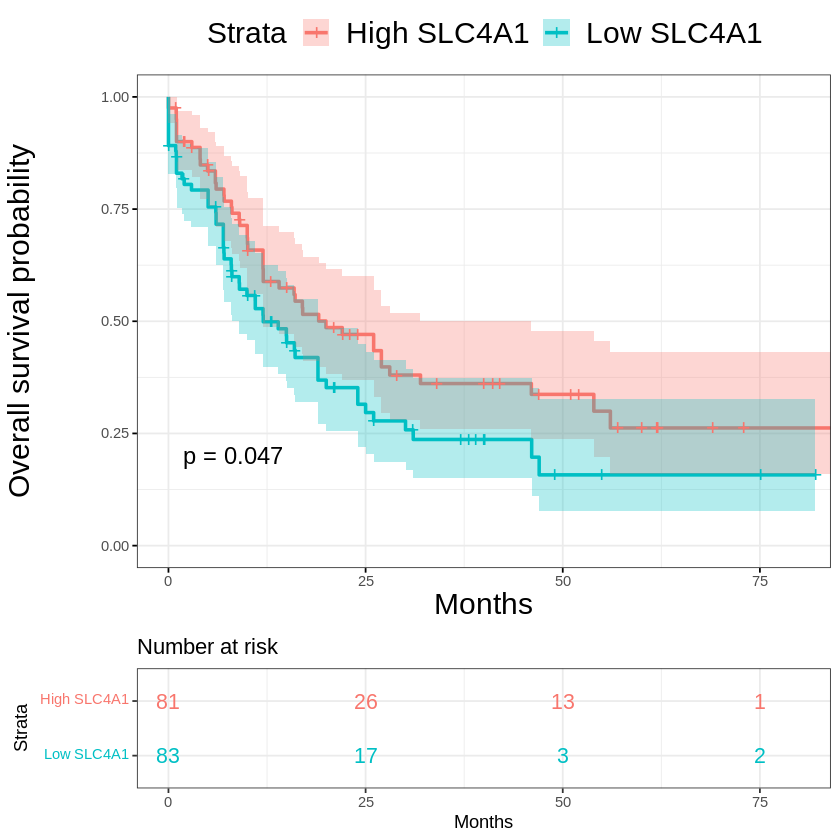

In [ ]:
unique_genes <- unique(ovl_gp$gene)
for (gene in unique_genes) {
  # Subset survival and gene expression data for the current gene
  surv <- subset(surv_rna, geneID %in% gene)
  surv$exp <- ifelse(surv$value > median(surv$value), "High expression", "Low expression")

  # Fit Kaplan-Meier survival curve
  kmcurve <- survfit(Surv(OS, STATUS) ~ exp, data = surv)

  # Create and print the ggsurvplot
  p <- ggsurvplot(kmcurve, data = surv, pval = TRUE,
                  xlab = "Months", ylab = "Overall survival probability",
                  size = 1, conf.int = TRUE, xlim = c(0, 80),
                  risk.table = TRUE, risk.table.col = "strata",
                  legend.labs = c(paste0("High ", gene), paste0("Low ", gene)),
                  risk.table.height = 0.25, ggtheme = theme_bw(),
                  font.legend = 18, font.x = 18, font.y = 18)

  print(p)
}

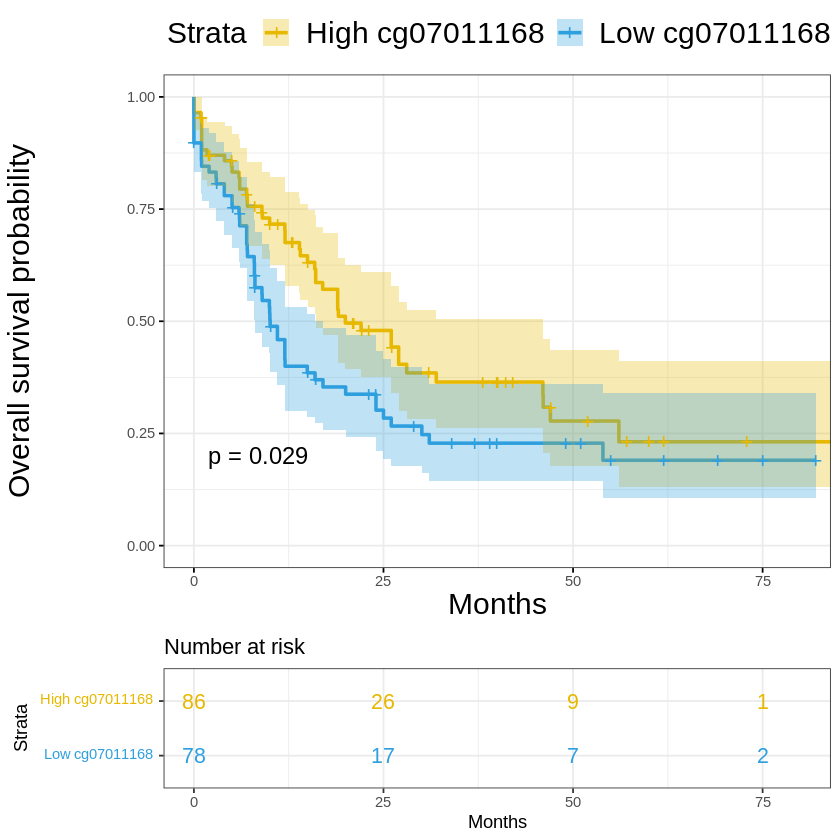

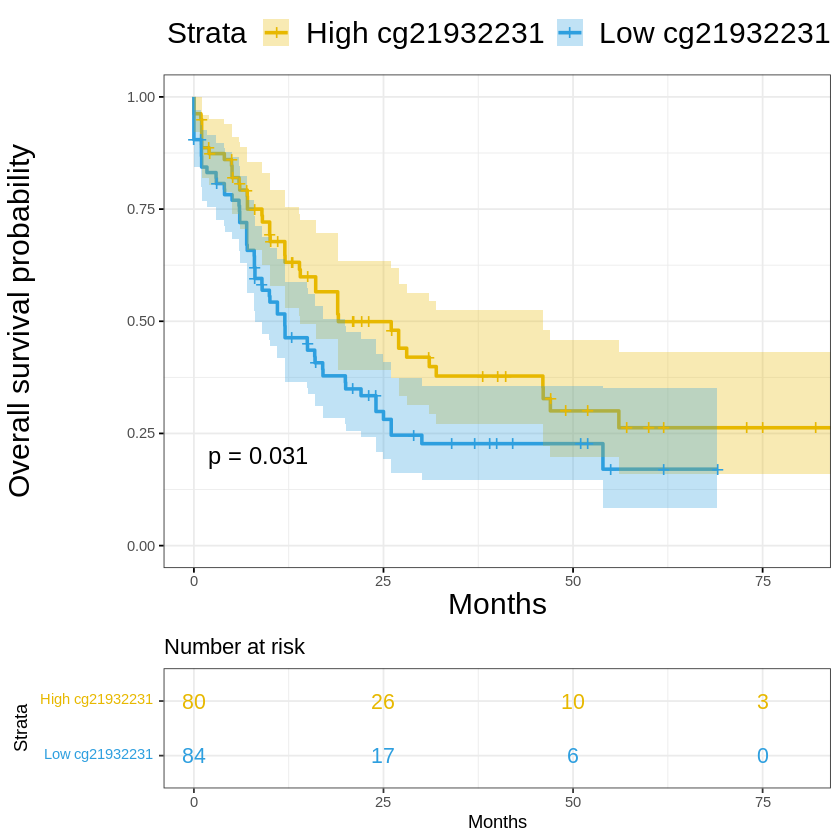

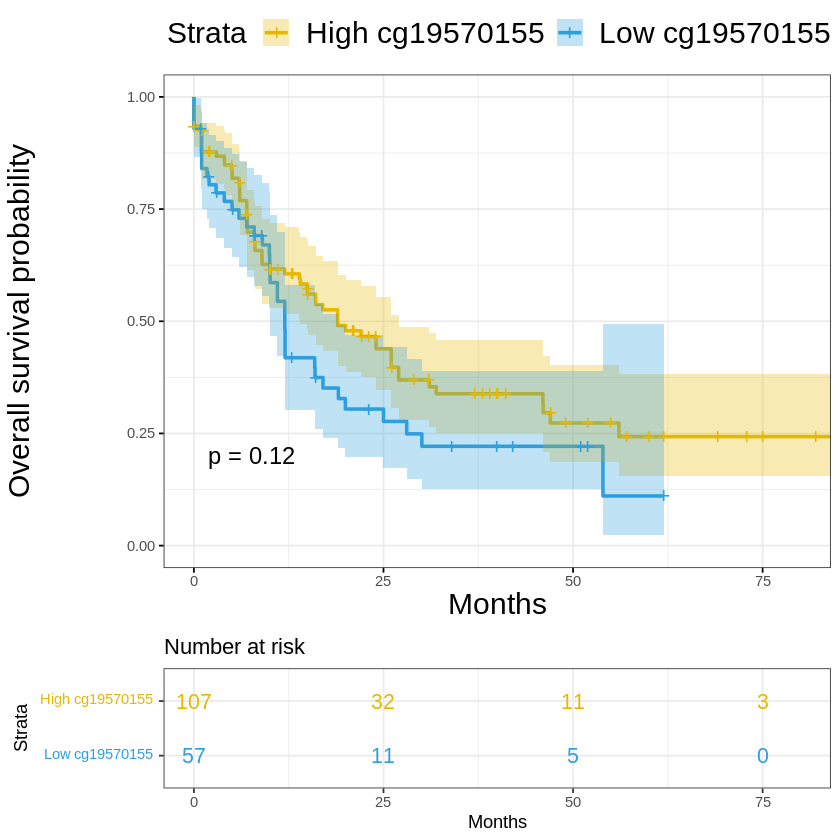

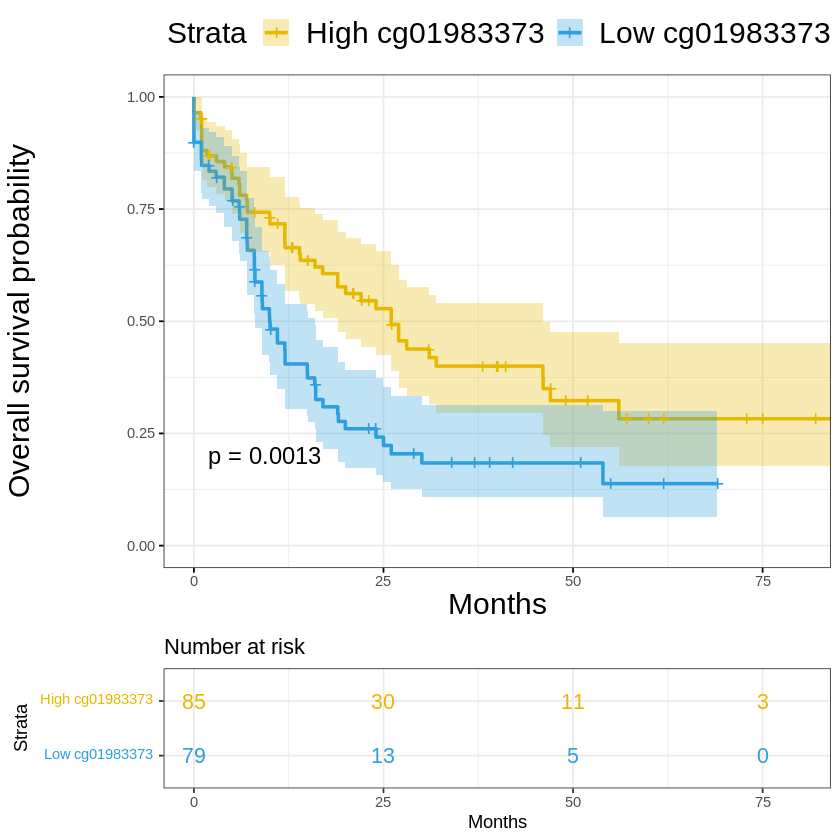

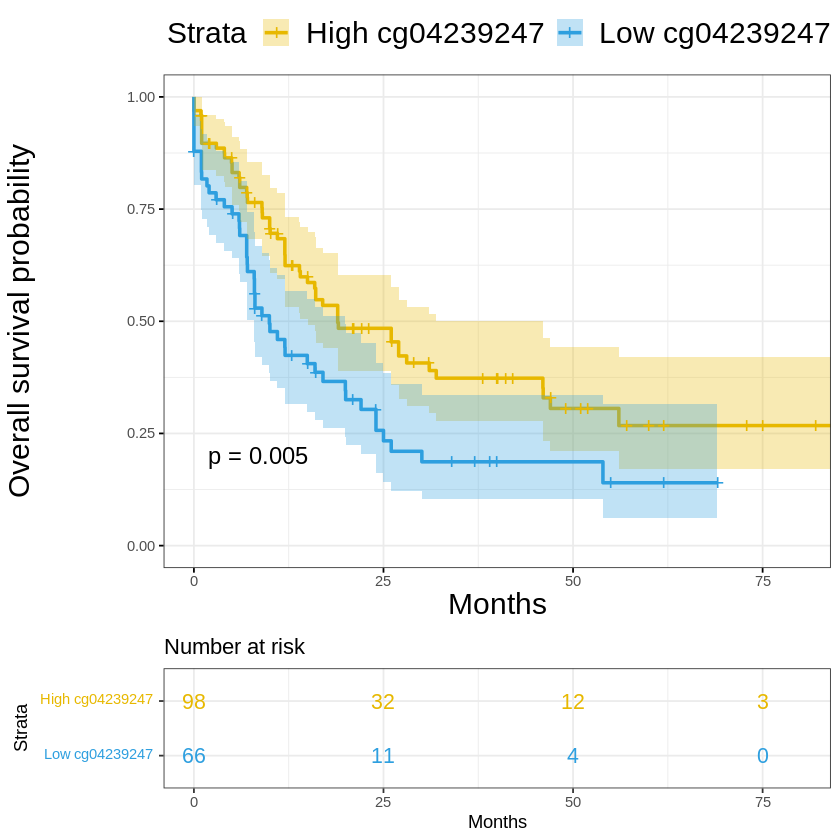

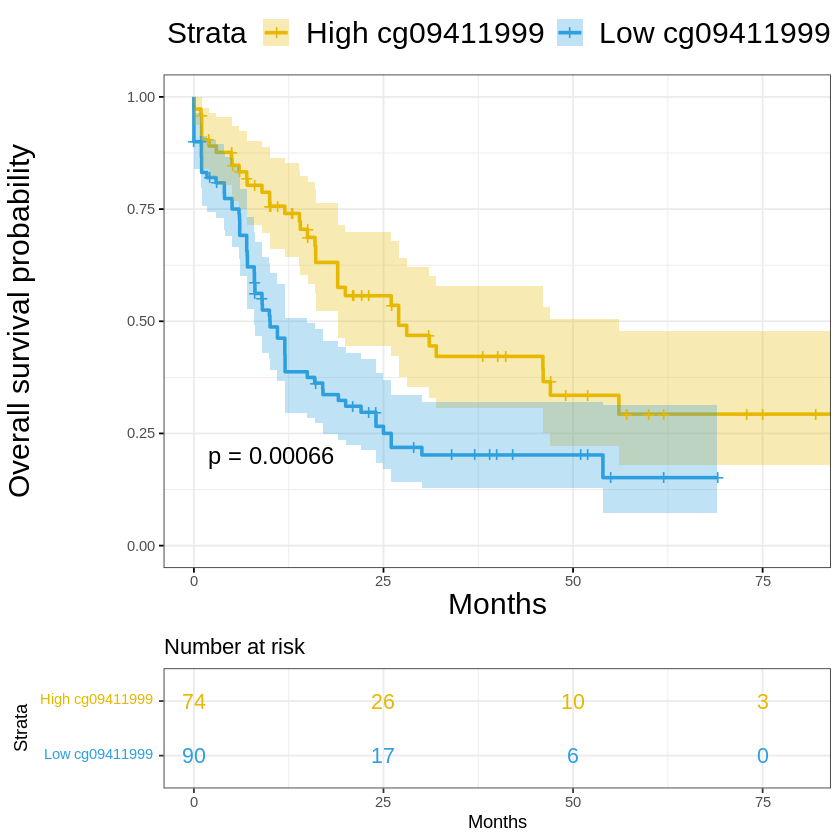

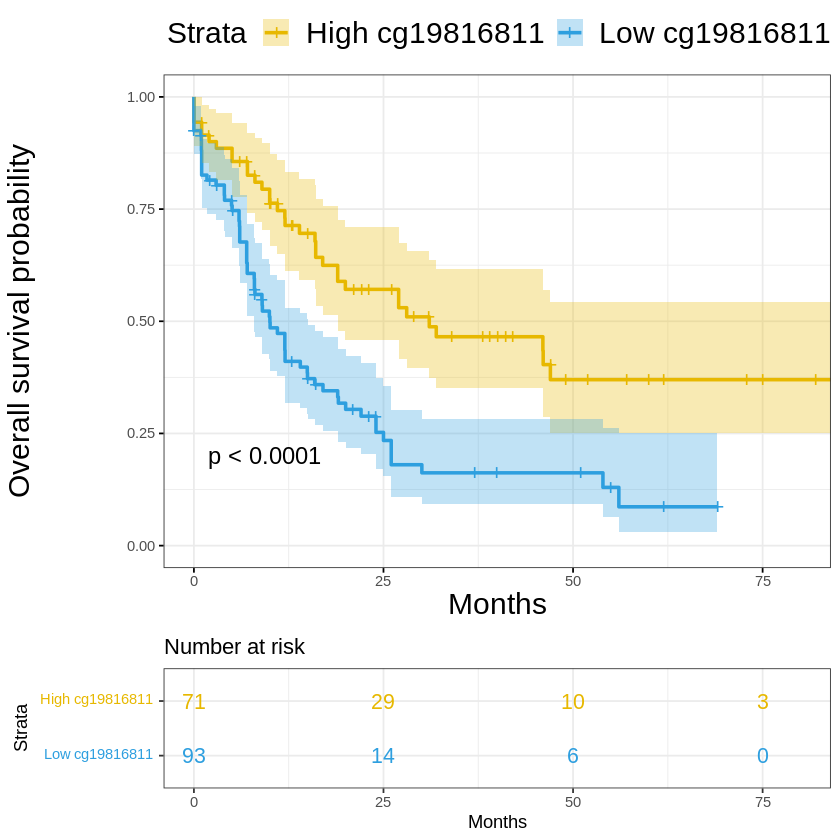

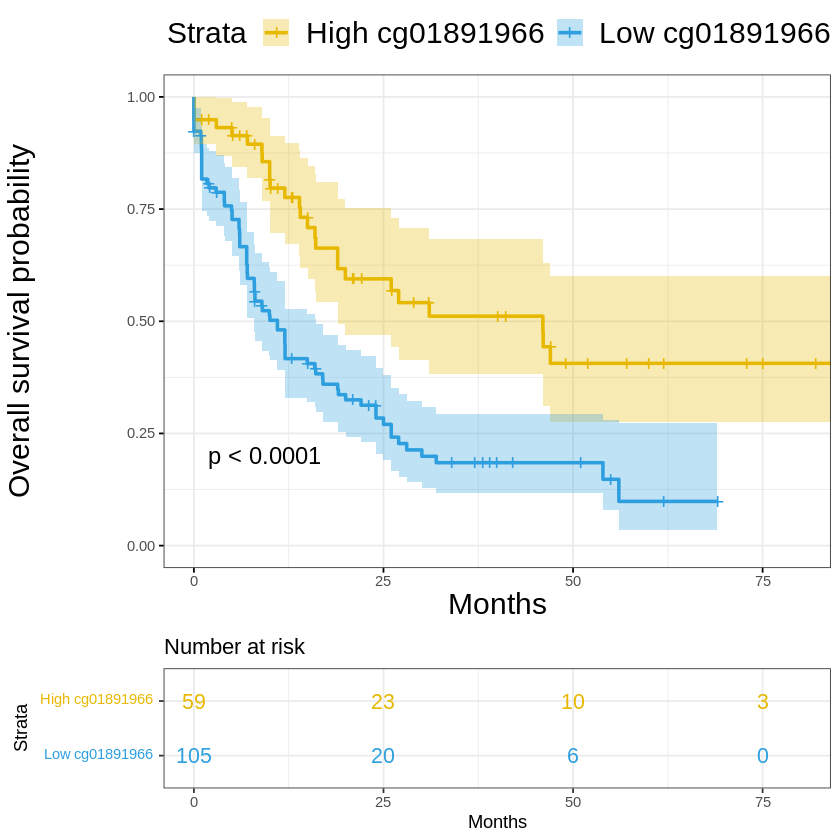

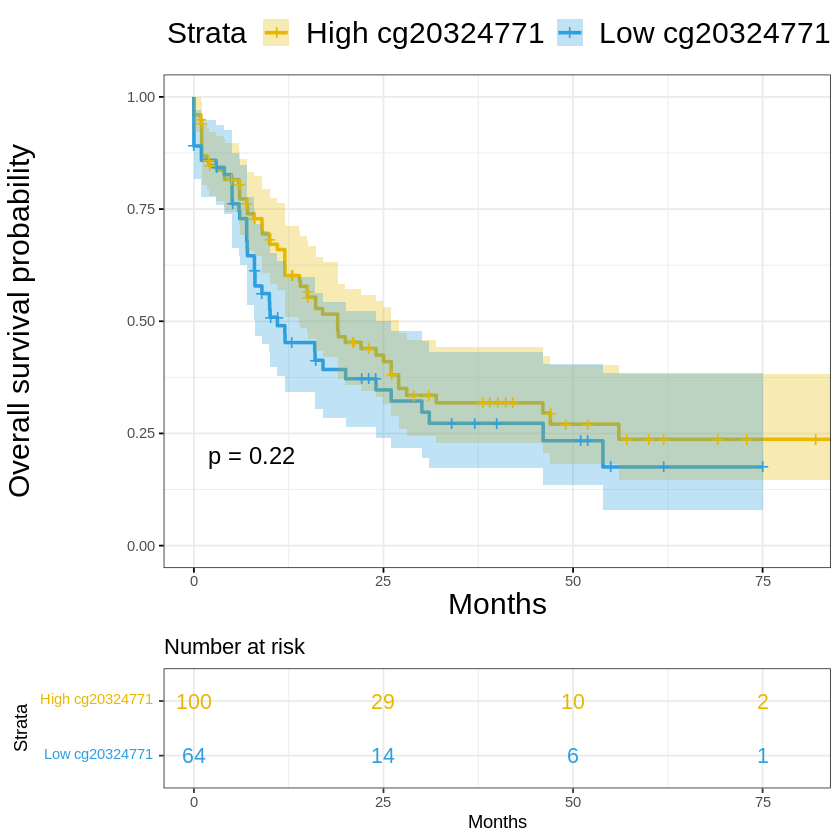

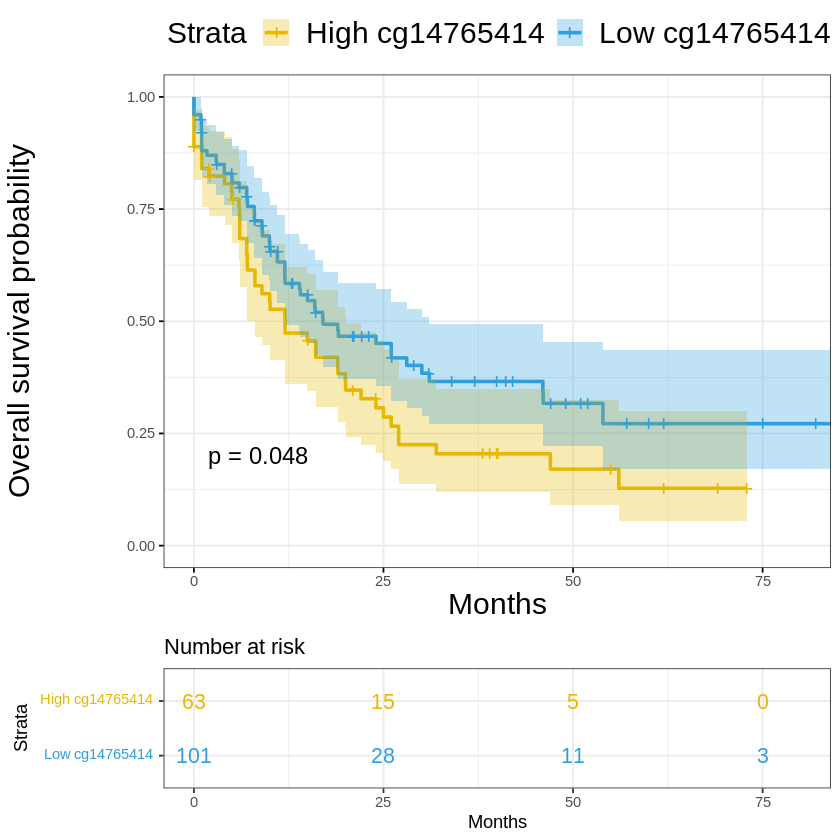

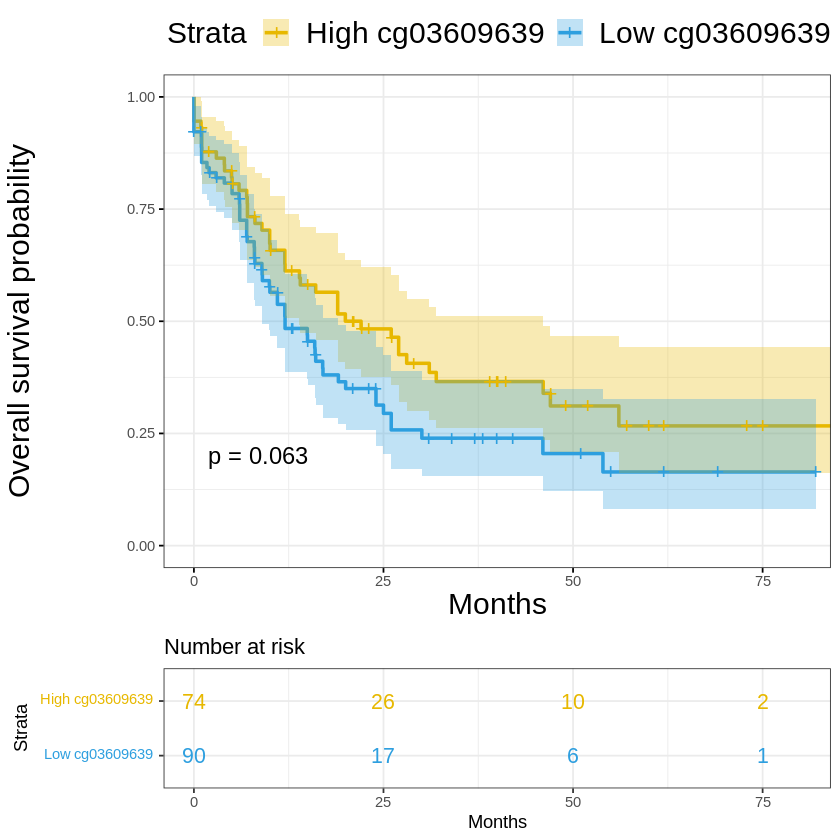

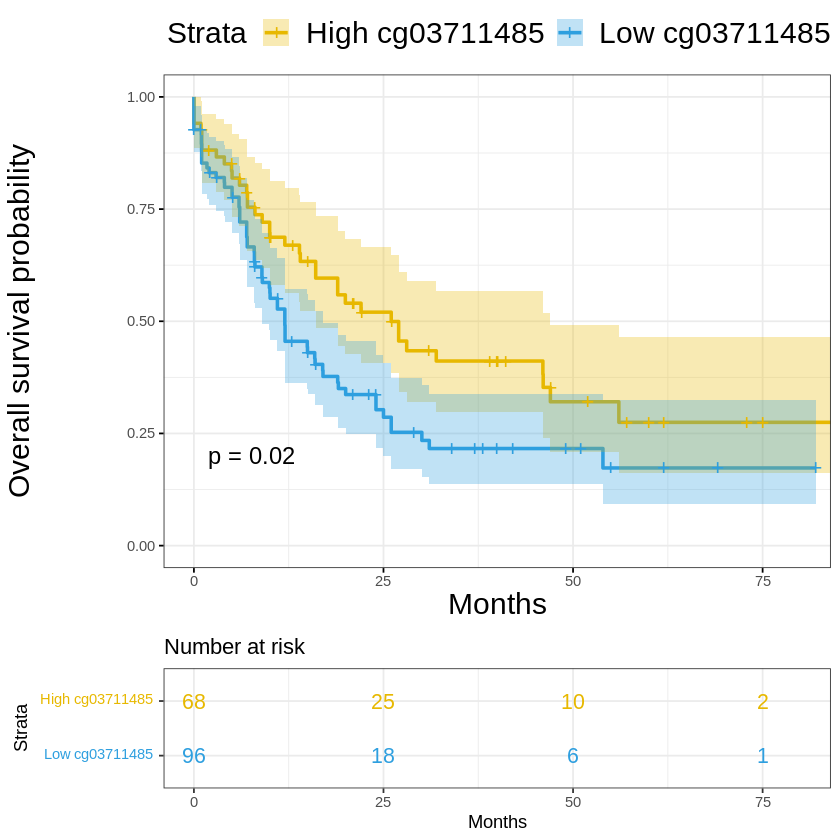

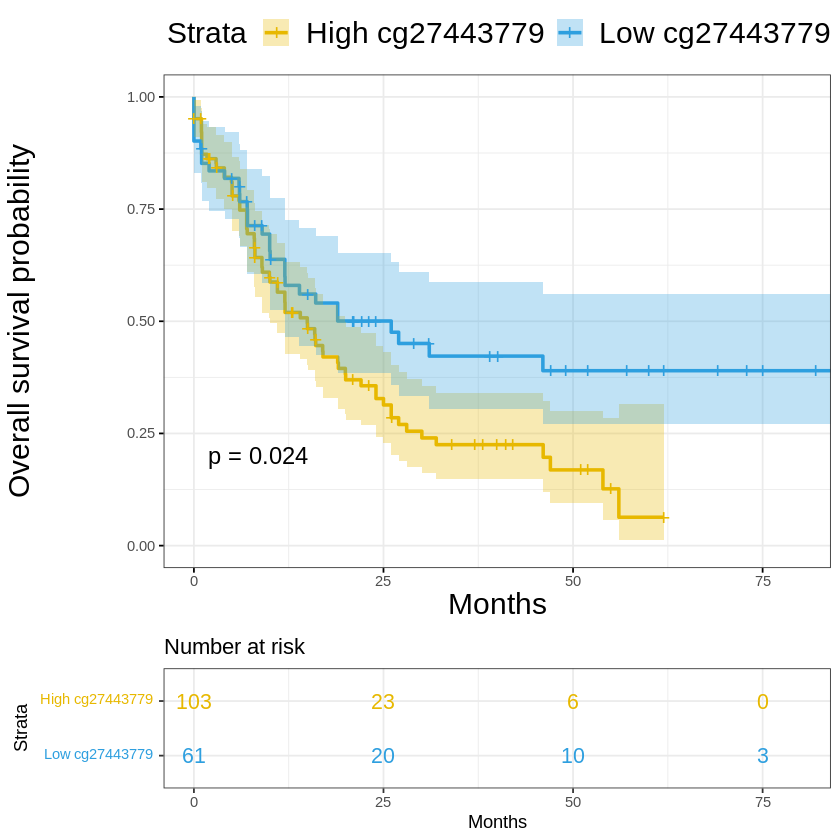

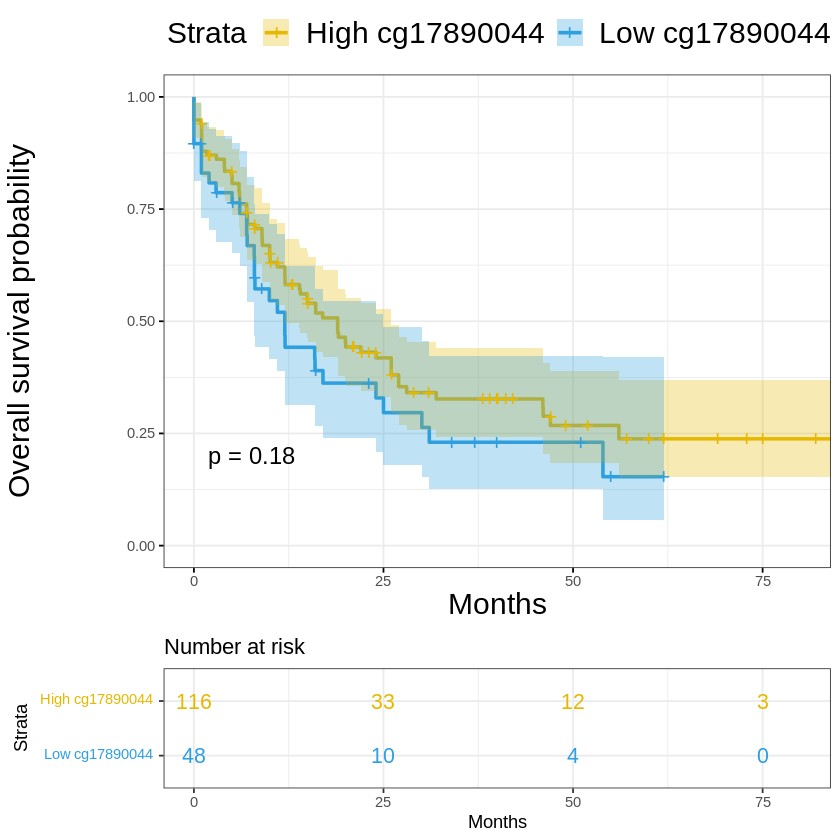

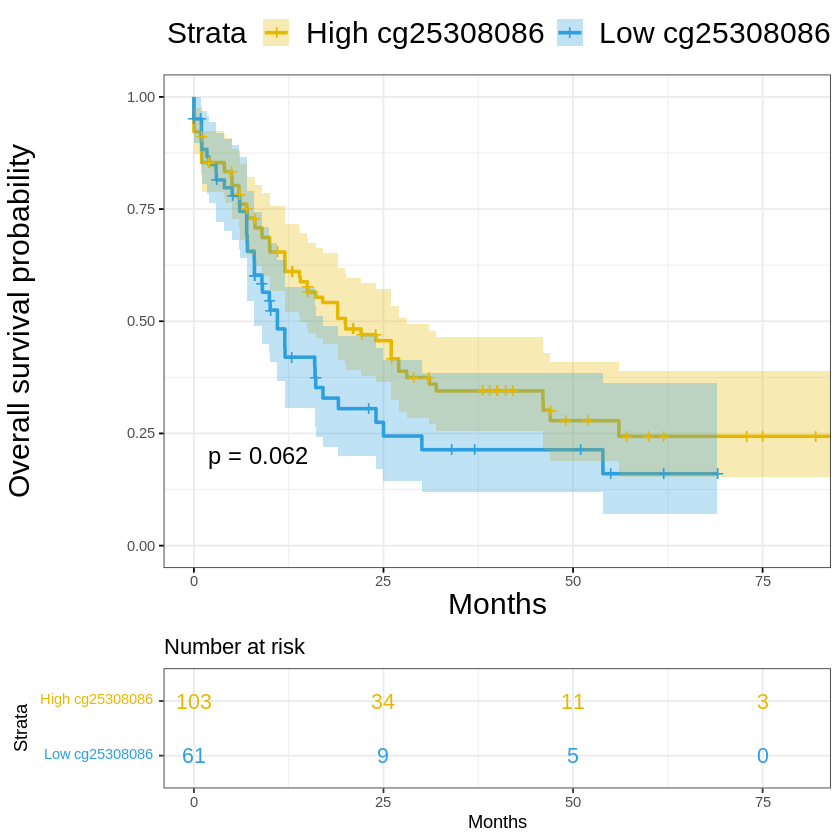

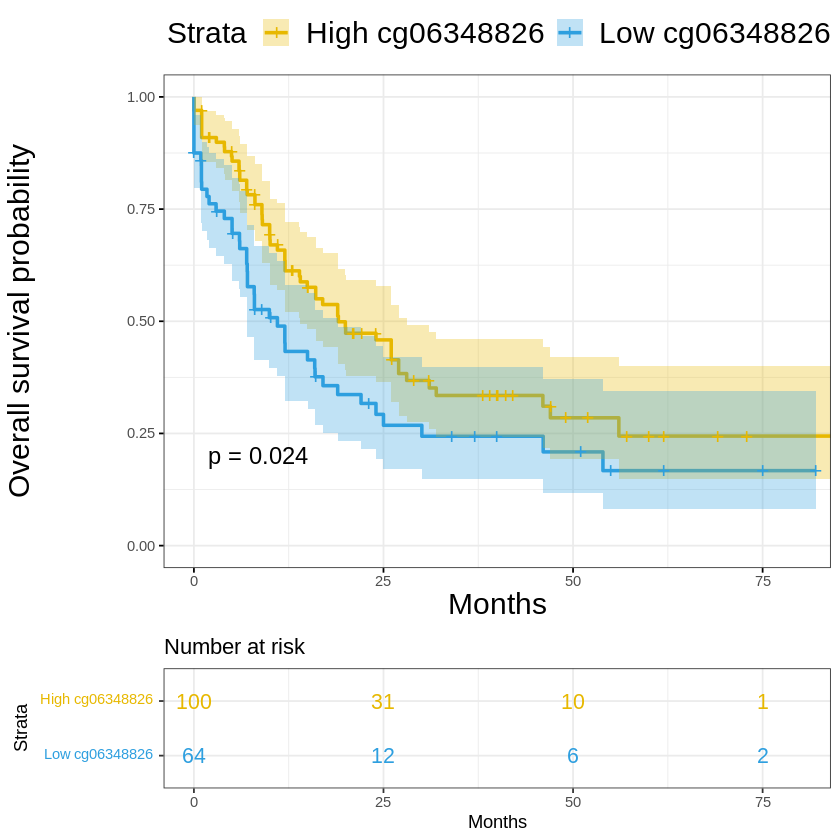

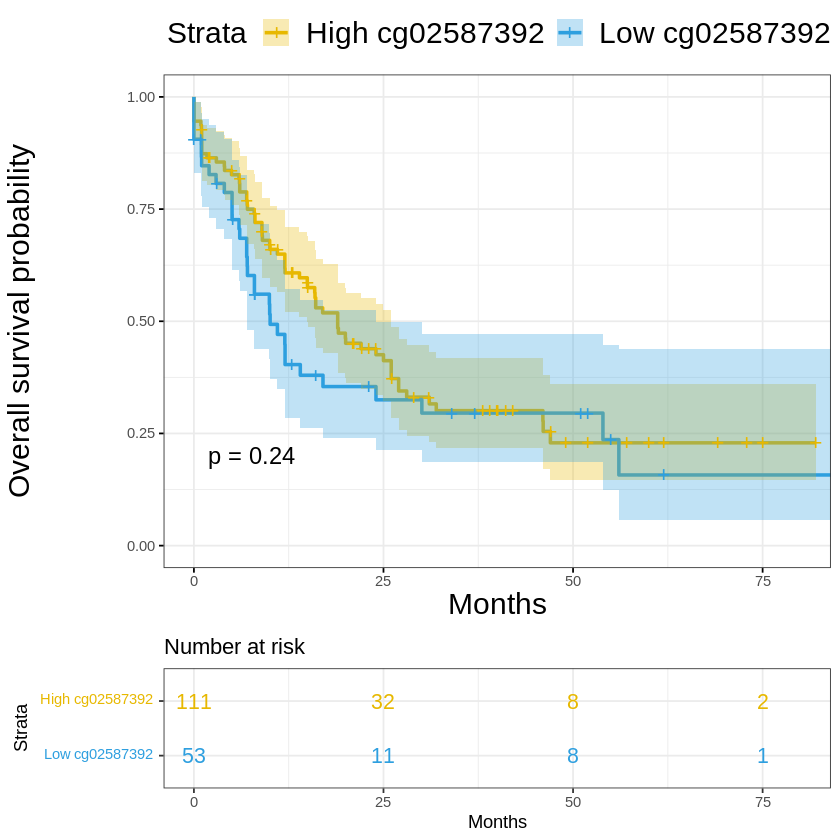

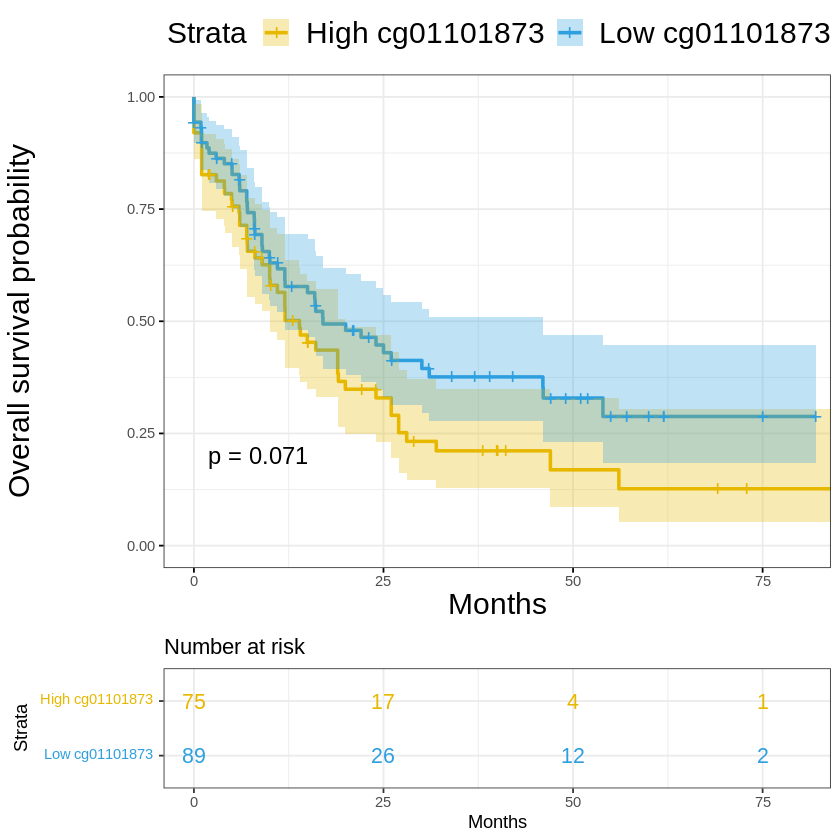

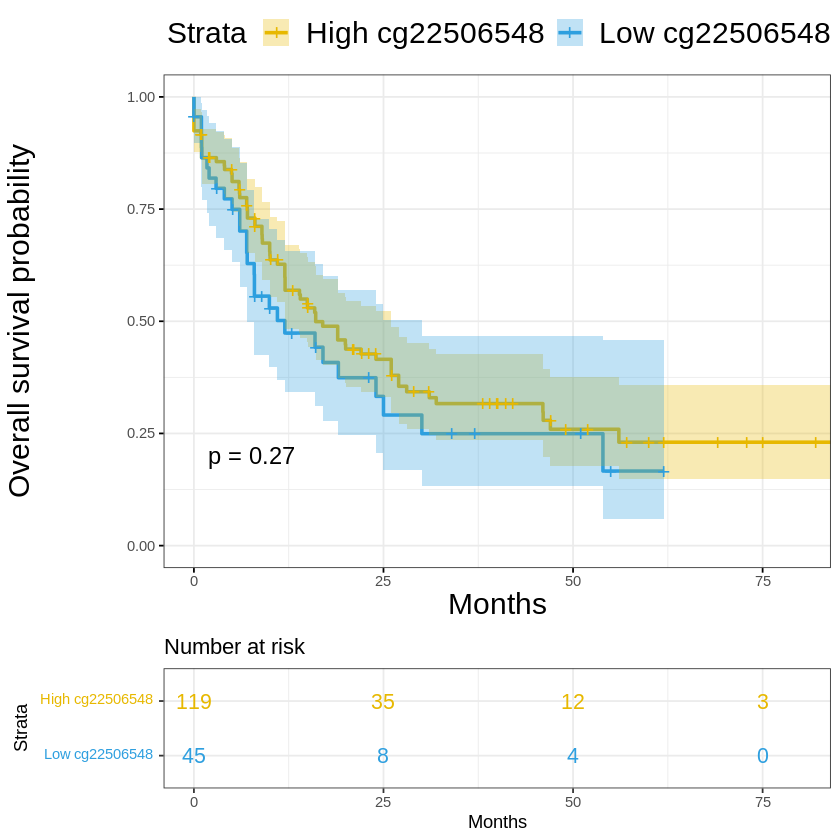

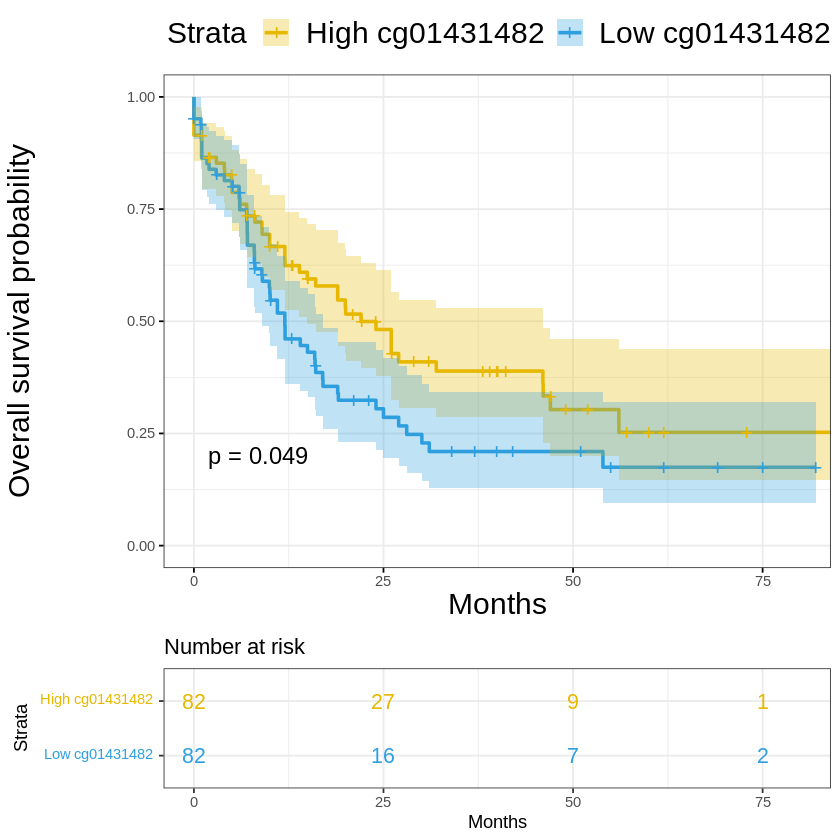

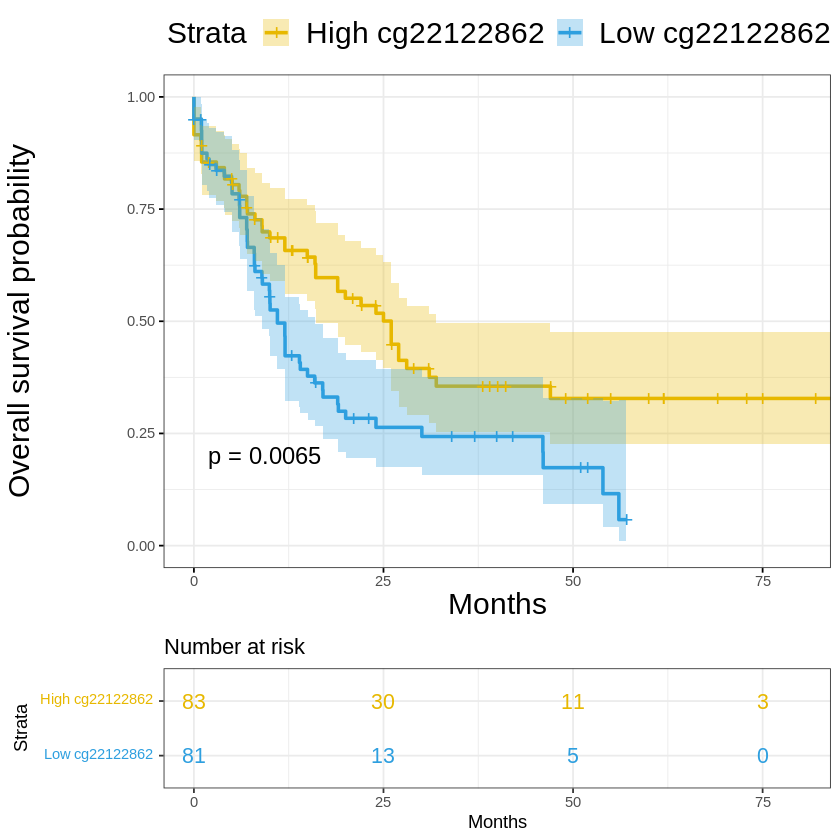

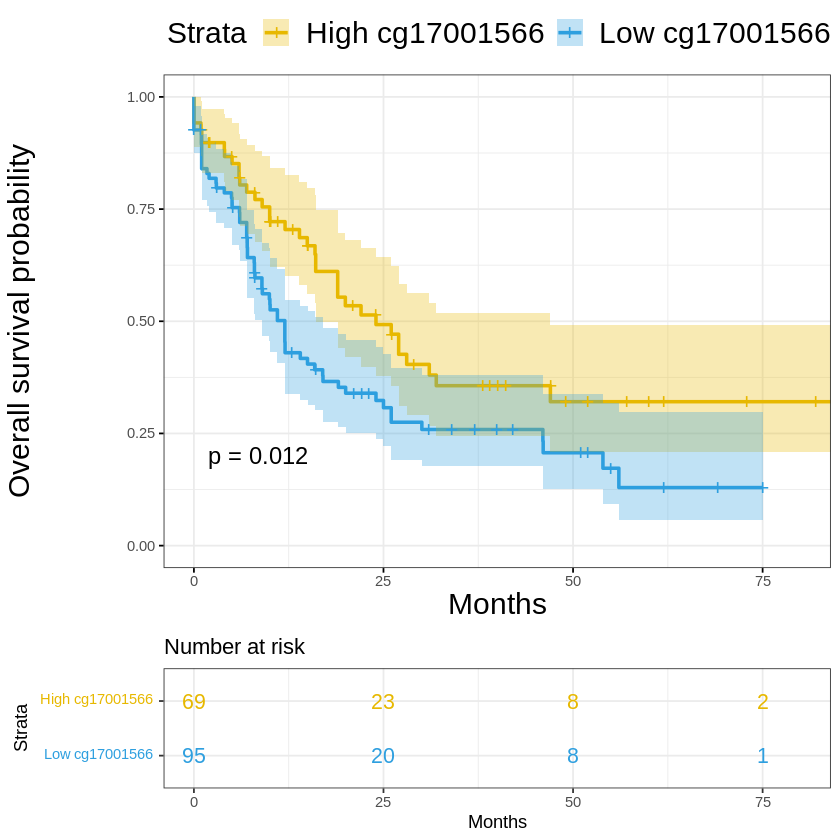

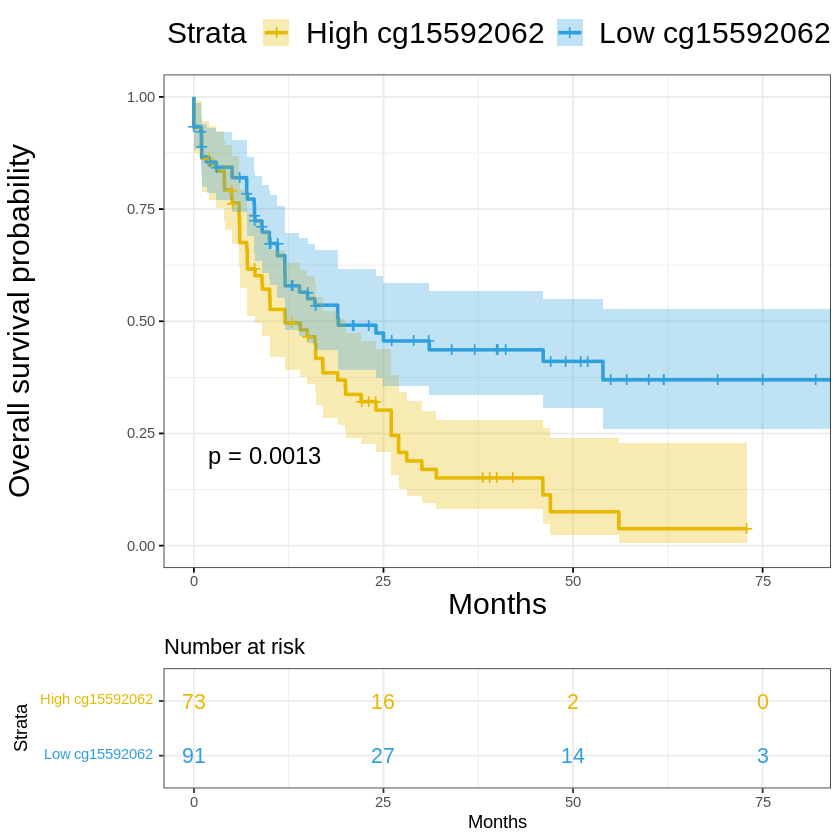

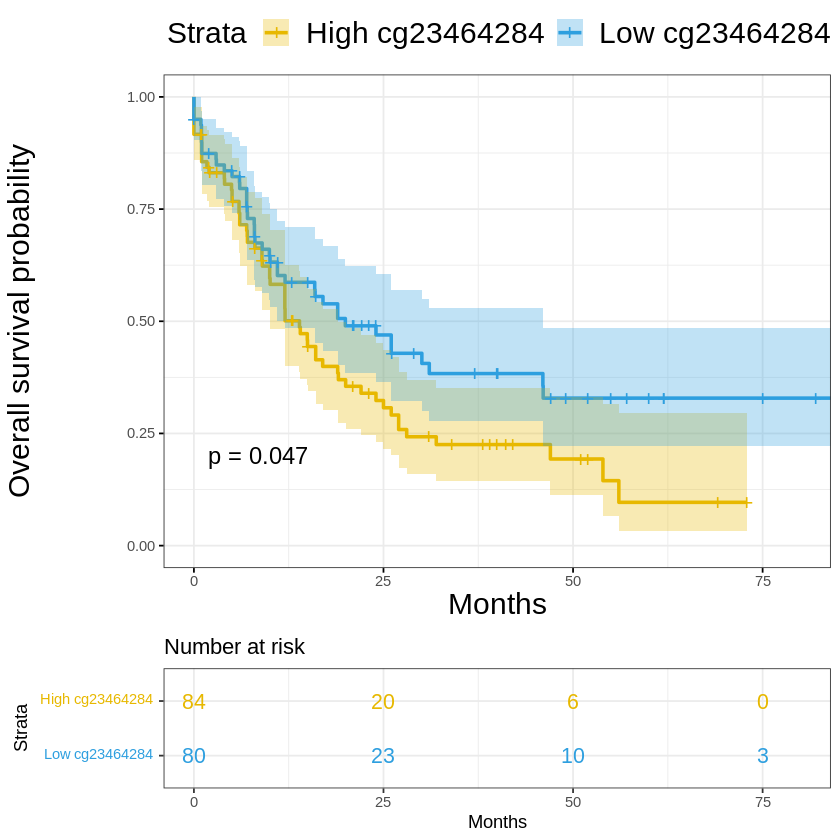

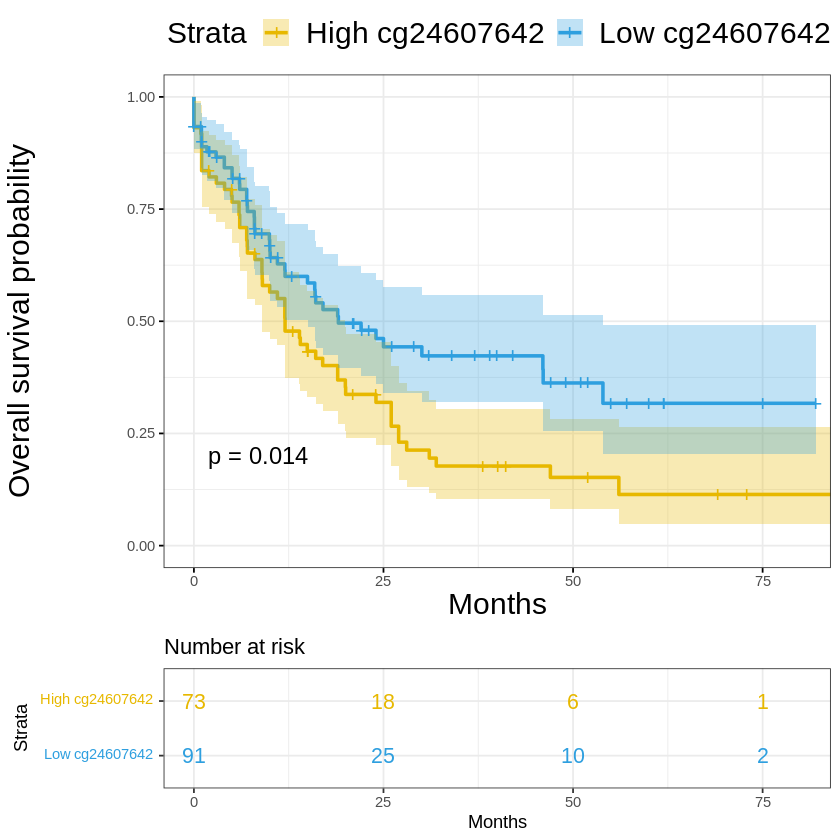

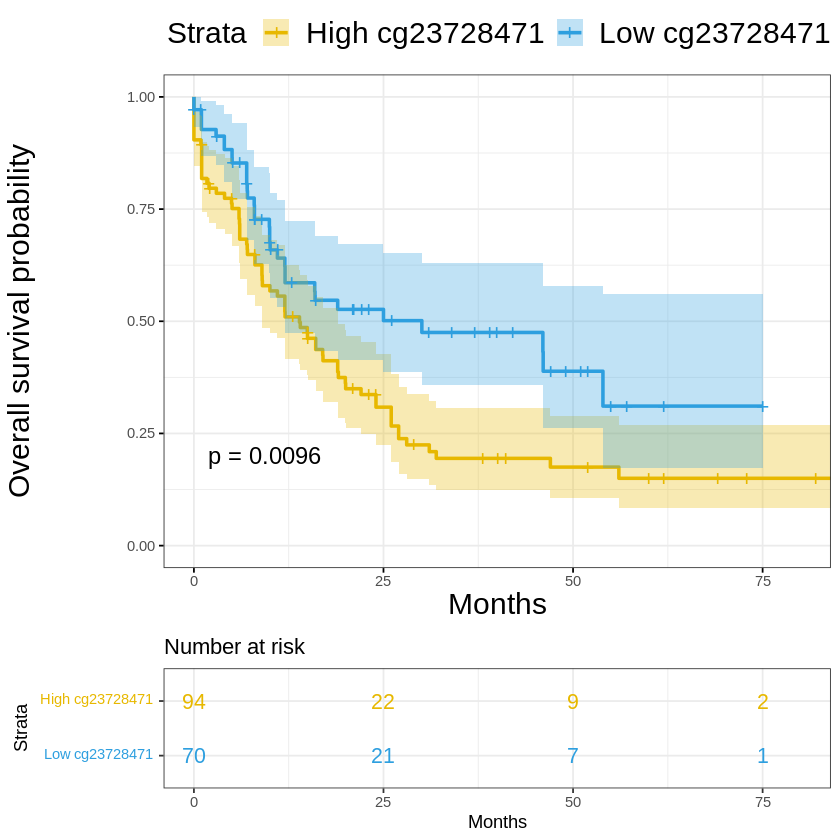

In [ ]:
# Iterate over significant probes
for (probe in ovl_gp$probeID) {
  # Subset survival and methylation data for the current probe
  surv <- subset(surv_meth, probeID %in% probe)
  surv$meth <- ifelse(surv$value > mean(surv$value), "High methylation", "Low methylation")

  # Fit Kaplan-Meier survival curve
  kmcurve <- survfit(Surv(OS, STATUS) ~ meth, data = surv)

  # Create the ggsurvplot
  p <- ggsurvplot(kmcurve, data = surv, pval = TRUE,
                  xlab = "Months", ylab = "Overall survival probability",
                  size = 1, conf.int = TRUE, xlim = c(0, 80),
                  risk.table = TRUE, risk.table.col = "strata",
                  legend.labs = c(paste0("High ", probe), paste0("Low ", probe)),
                  risk.table.height = 0.25, ggtheme = theme_bw(),
                  palette = c("#E7B800", "#2E9FDF"),
                  font.legend = 18, font.x = 18, font.y = 18)

    print(p)
}